In [1]:
import pickle
from helper_fxns import convert_param_vec_dict_to_param_dict, gelman_rubin_trace_dict, print_convergence_summary, sample_plots, create_trace_matrix, plot_histograms
from earm.lopez_embedded import model
%matplotlib inline
import os
import numpy as np
from corner import corner
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
/Users/Erin/Library/Python/2.7/lib/python/site-packages/IPython/utils/traitlets.py:5: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  warn("IPython.utils.traitlets has moved to a top-level traitlets package.")


In [2]:
len(model.parameters_rules())

105

In [3]:
os.chdir('/Users/Erin/git/accre_data_analysis/normal_priors_sd3')

In [4]:
traces = {}
for trace in ['a', 'b', 'c', 'd']:
    traces[trace] = [np.load('earm_dreamz_3chain_normal_'+str(trace)+'_sampled_params_chain_0.npy')]
    for chain in range(1, 3):
        traces[trace].append(np.load('earm_dreamz_3chain_normal_'+str(trace)+'_sampled_params_chain_'+str(chain)+'.npy'))

In [5]:
logps = {}
for trace in ['a', 'b', 'c', 'd']:
    logps[trace] = [np.load('earm_dreamz_3chain_normal_'+str(trace)+'_logps_chain_0.npy')]
    print 'Logp of trace: ',trace,' chain: 0 = ',logps[trace][-1]
    for chain in range(1, 3):
        logps[trace].append(np.load('earm_dreamz_3chain_normal_'+str(trace)+'_logps_chain_'+str(chain)+'.npy'))
        print 'Logp of trace: ',trace,' chain: ',chain,' = ',logps[trace][-1][-1]

Logp of trace:  a  chain: 0 =  [[-2291.94331666]
 [ -902.24566465]
 [ -902.24566465]
 ..., 
 [  158.50691394]
 [  159.66854464]
 [  159.66854464]]
Logp of trace:  a  chain:  1  =  [ 169.21118945]
Logp of trace:  a  chain:  2  =  [ 162.70188148]
Logp of trace:  b  chain: 0 =  [[-2624.2499122 ]
 [-2624.2499122 ]
 [-2624.2499122 ]
 ..., 
 [  154.34244362]
 [  154.34244362]
 [  154.34244362]]
Logp of trace:  b  chain:  1  =  [ 163.59074748]
Logp of trace:  b  chain:  2  =  [ 157.39627856]
Logp of trace:  c  chain: 0 =  [[-441.0599136 ]
 [-441.0599136 ]
 [-184.61811815]
 ..., 
 [ 157.35746547]
 [ 157.35746547]
 [ 157.18337557]]
Logp of trace:  c  chain:  1  =  [ 154.29984544]
Logp of trace:  c  chain:  2  =  [ 156.93488619]
Logp of trace:  d  chain: 0 =  [[-1864.48534157]
 [-1864.48534157]
 [-1864.48534157]
 ..., 
 [  155.93935503]
 [  155.93935503]
 [  155.93935503]]
Logp of trace:  d  chain:  1  =  [ 162.68341315]
Logp of trace:  d  chain:  2  =  [ 161.6862197]


In [6]:
traces['b'][0][:,72]

array([-1.24677358, -1.24677358, -1.24677358, ..., -0.98780835,
       -0.98780835, -0.98780835])

In [7]:
traces['a'][0][:,72]

array([-1.04974798, -1.04974798, -1.04974798, ...,  0.3222375 ,
        0.41257058,  0.41257058])

In [8]:
param_trace_dicts = {}
param_trace_dict_a = {}
gelman_rubin_dicts = {}
param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]
for run in ['a', 'b', 'c', 'd']:
    for i, param in enumerate(model.parameters_rules()):
        param_trace_dict_a[param.name] = [traces[run][chain][:,i] for chain in range(len(traces[run]))]
    param_trace_dicts[run] = param_trace_dict_a
    gelman_rubin_dicts[run] = gelman_rubin_trace_dict(param_trace_dict_a)
    param_trace_dict_a = {}
    param_trace_dict_a['param_list'] = [param.name for param in model.parameters_rules()]

In [9]:
print_convergence_summary(param_trace_dicts['a'])

Number of parameters with GR below 1.2:  105  of  105  parameters.
Percent of parameters with GR below 1.2:  100.0
Number of parameters with GR below 1.1:  103  of  105  parameters.
Percent of parameters with GR below 1.1:  98.0952380952


[105, 100.0, 103, 98.09523809523809]

In [10]:
print_convergence_summary(param_trace_dicts['b'])

Number of parameters with GR below 1.2:  62  of  105  parameters.
Percent of parameters with GR below 1.2:  59.0476190476
Number of parameters with GR below 1.1:  41  of  105  parameters.
Percent of parameters with GR below 1.1:  39.0476190476


[62, 59.04761904761905, 41, 39.04761904761905]

In [11]:
print_convergence_summary(param_trace_dicts['c'])

Number of parameters with GR below 1.2:  99  of  105  parameters.
Percent of parameters with GR below 1.2:  94.2857142857
Number of parameters with GR below 1.1:  88  of  105  parameters.
Percent of parameters with GR below 1.1:  83.8095238095


[99, 94.28571428571428, 88, 83.80952380952381]

In [12]:
print_convergence_summary(param_trace_dicts['d'])

Number of parameters with GR below 1.2:  89  of  105  parameters.
Percent of parameters with GR below 1.2:  84.7619047619
Number of parameters with GR below 1.1:  60  of  105  parameters.
Percent of parameters with GR below 1.1:  57.1428571429


[89, 84.76190476190476, 60, 57.14285714285714]

In [13]:
param_trace_dicts['d']['bind_L_R_to_LR_kf']

[array([-6.33995967, -6.33995967, -6.33995967, ..., -8.662797  ,
        -8.662797  , -8.662797  ]),
 array([-6.18008603, -6.2797725 , -6.2797725 , ..., -8.87854035,
        -8.87854035, -8.87854035]),
 array([-6.18038037, -6.18038037, -6.18038037, ..., -9.10604942,
        -9.10604942, -9.10604942])]

50000
3
50000


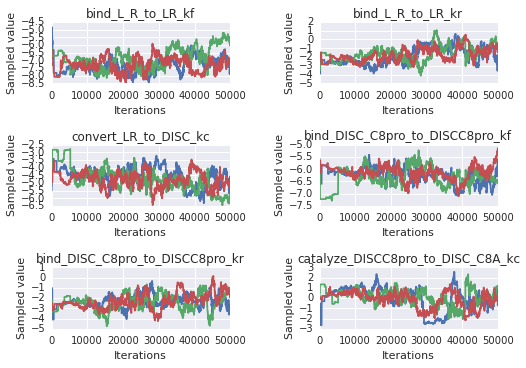

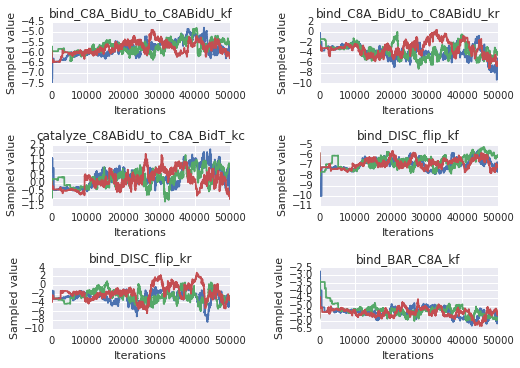

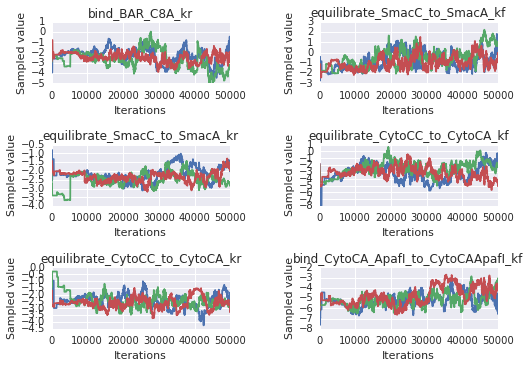

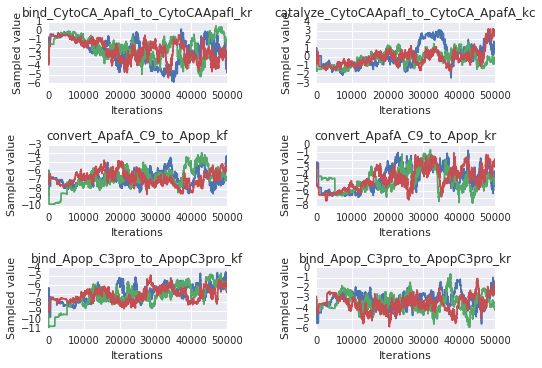

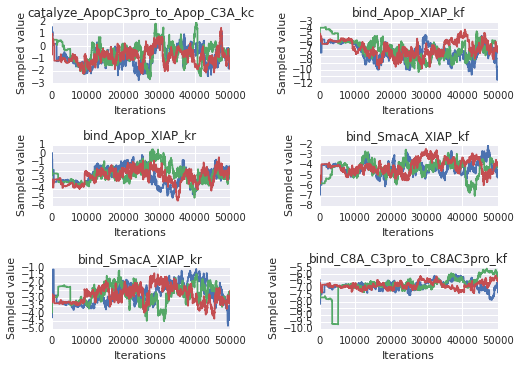

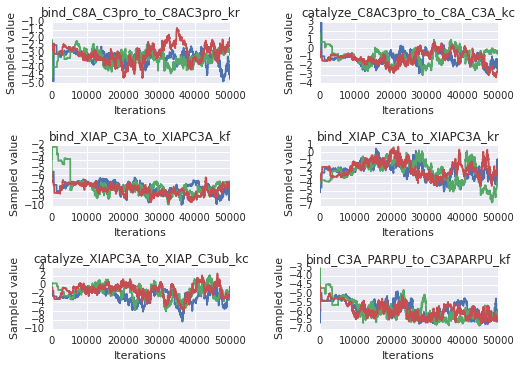

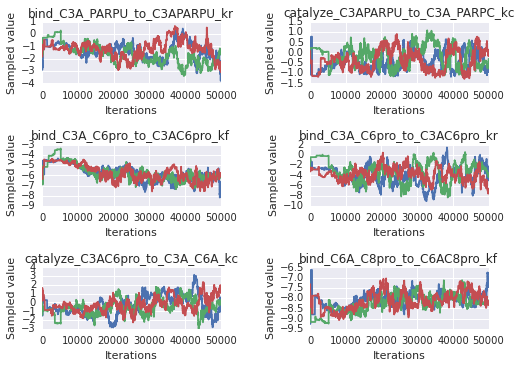

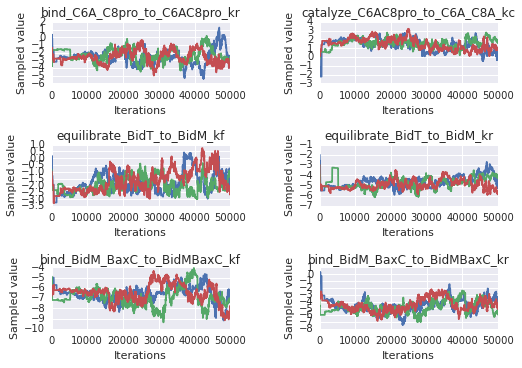

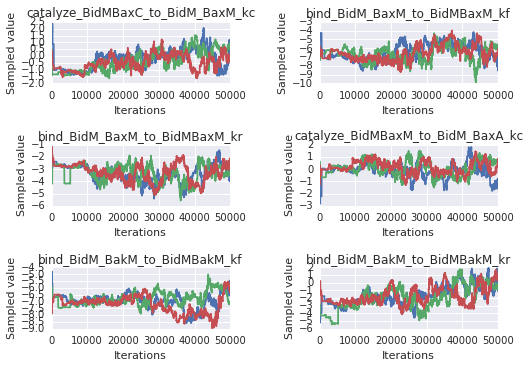

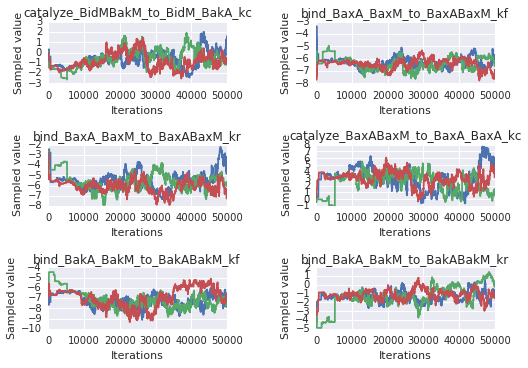

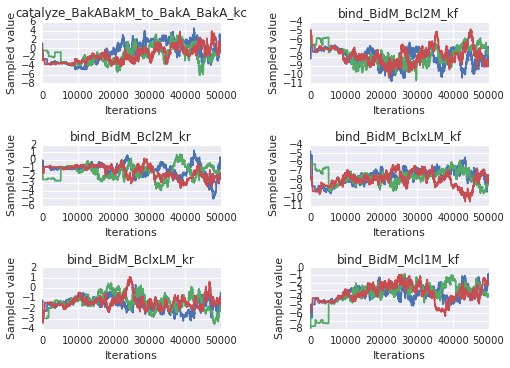

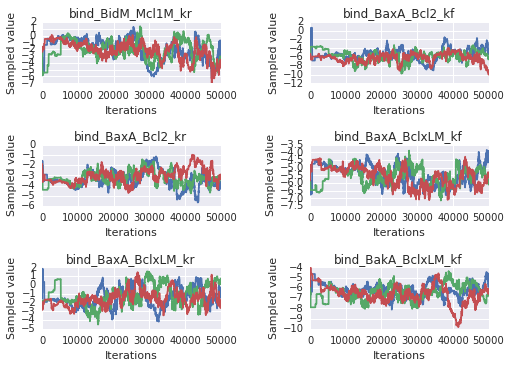

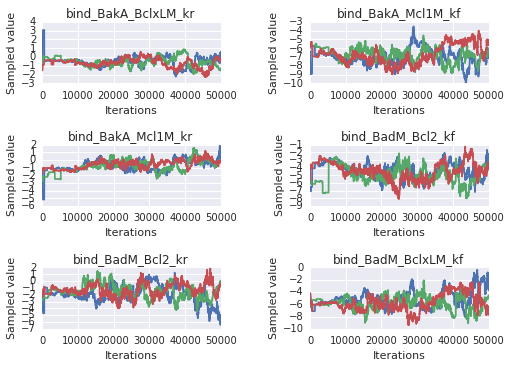

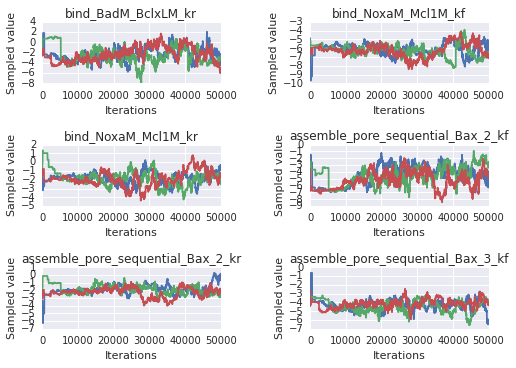

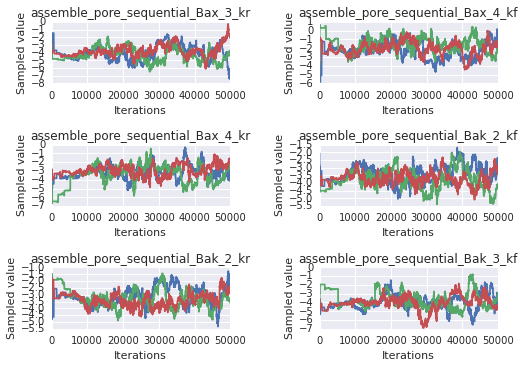

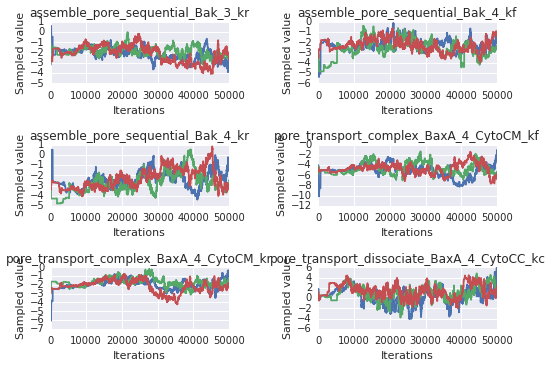

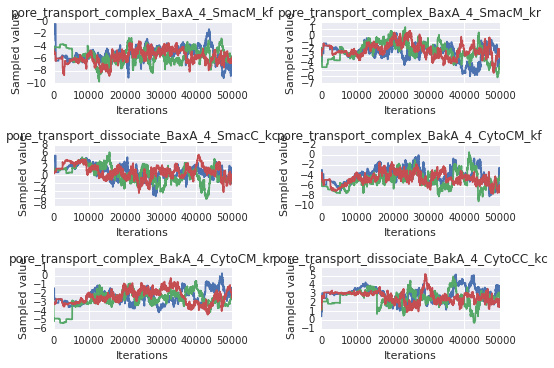

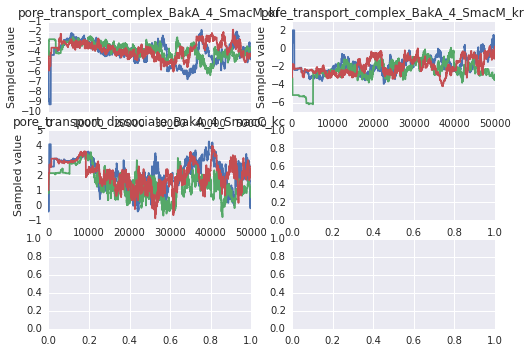

In [15]:
sample_plots(param_trace_dicts['a'])

In [16]:
trace_arr_a = create_trace_matrix(param_trace_dicts['a'], burnin=12000, thin=1)
trace_arr_b = create_trace_matrix(param_trace_dicts['b'], burnin=12000, thin=1)
trace_arr_c = create_trace_matrix(param_trace_dicts['c'], burnin=12000, thin=1)
trace_arr_d = create_trace_matrix(param_trace_dicts['d'], burnin=12000, thin=1)

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


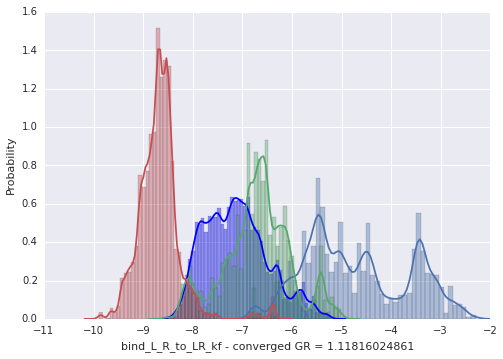

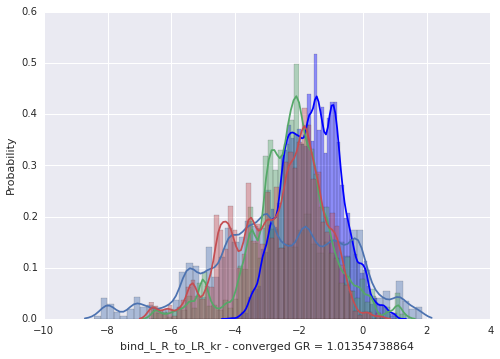

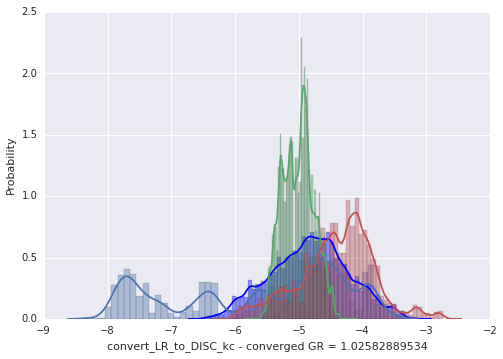

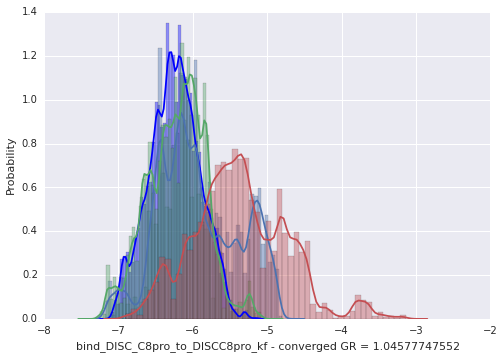

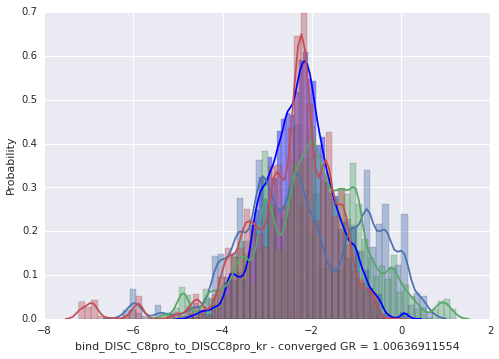

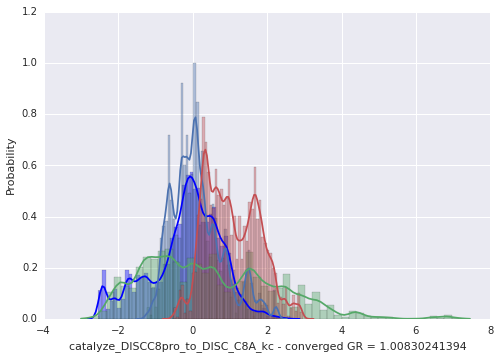

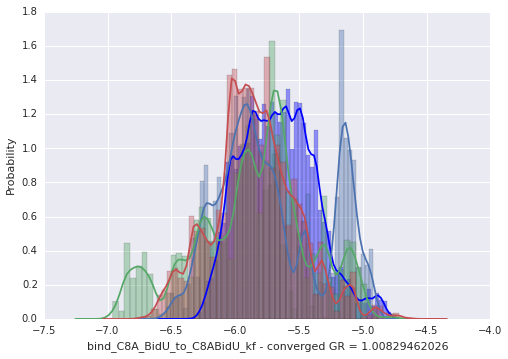

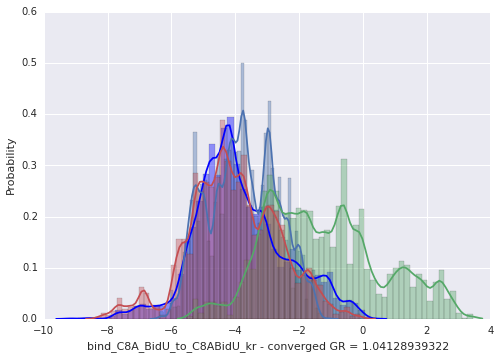

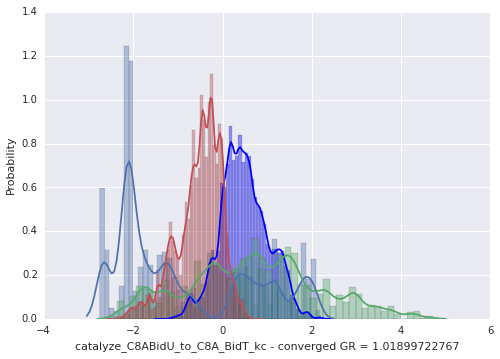

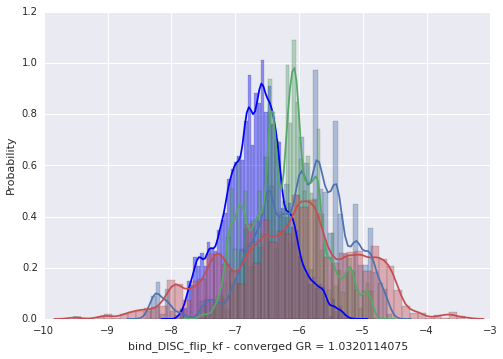

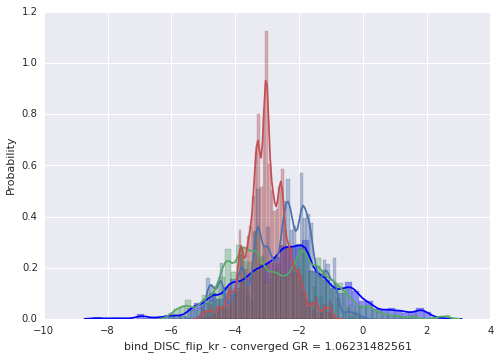

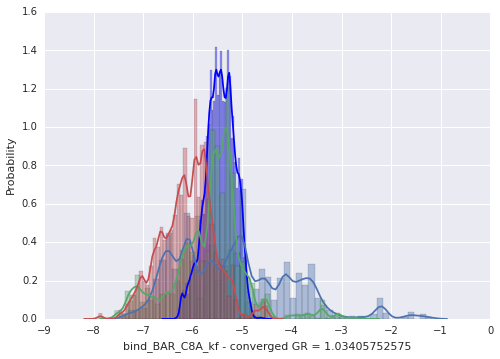

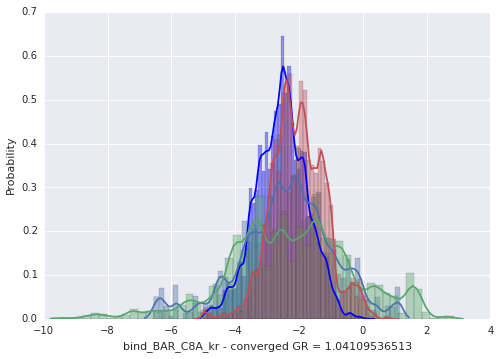

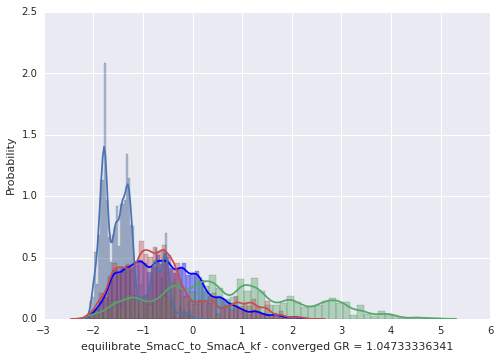

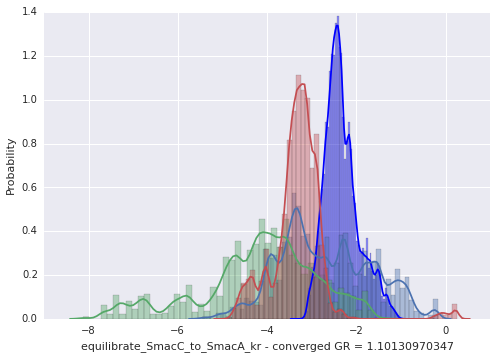

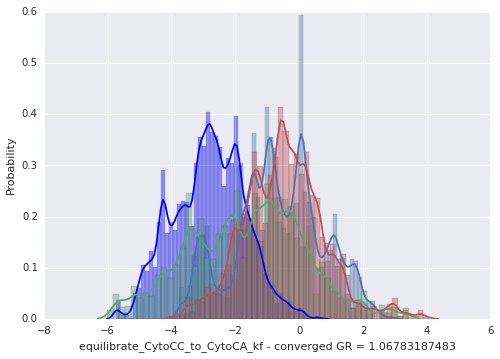

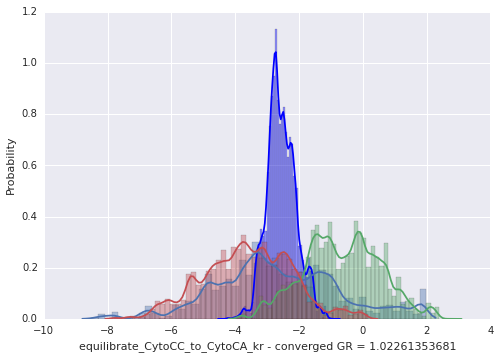

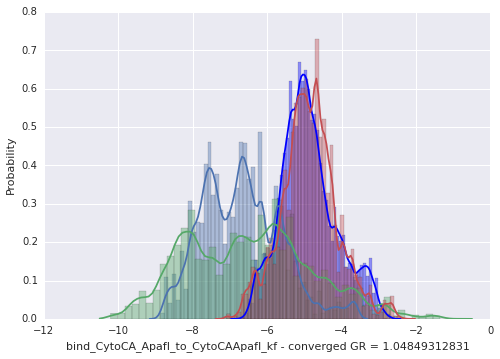

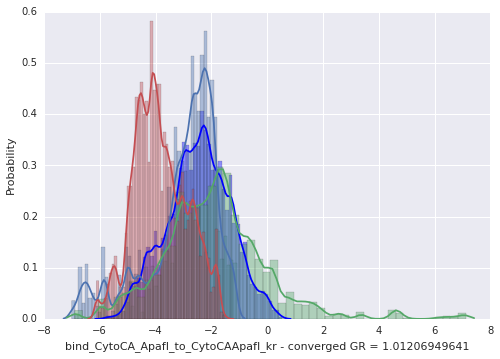

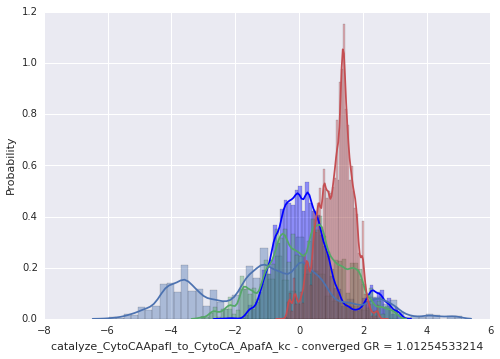

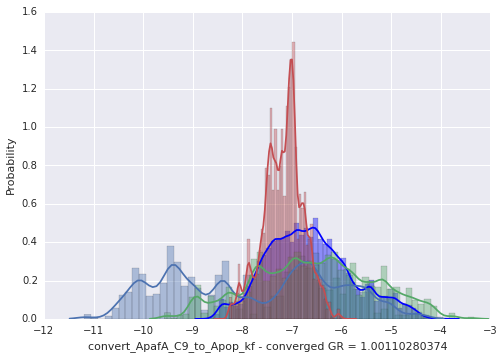

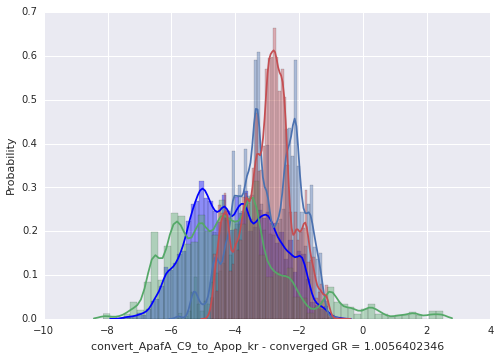

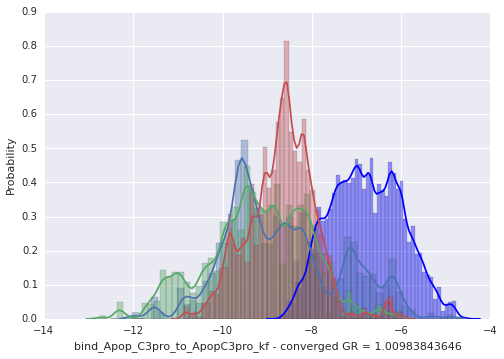

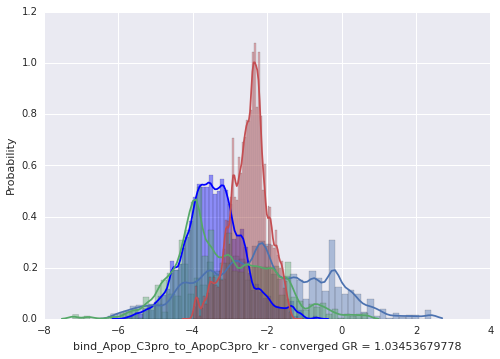

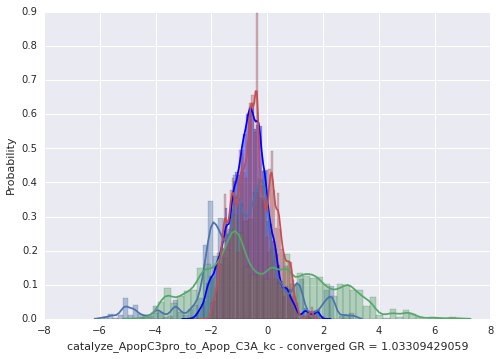

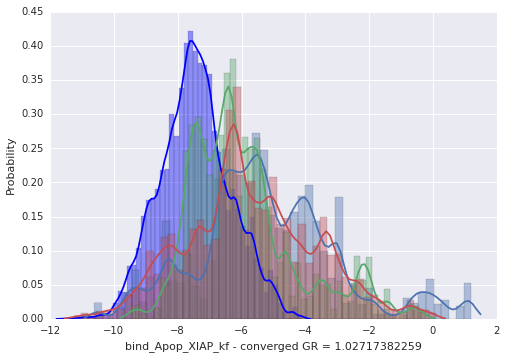

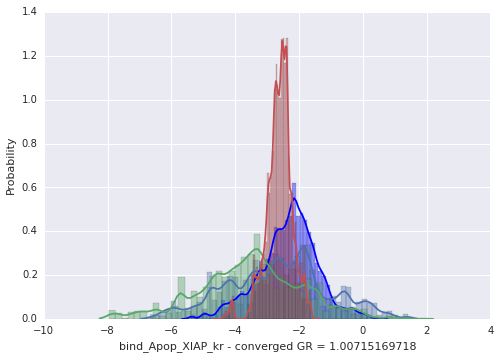

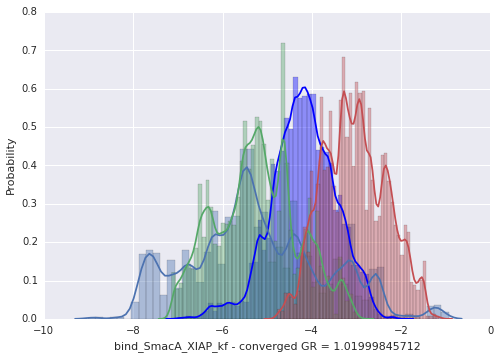

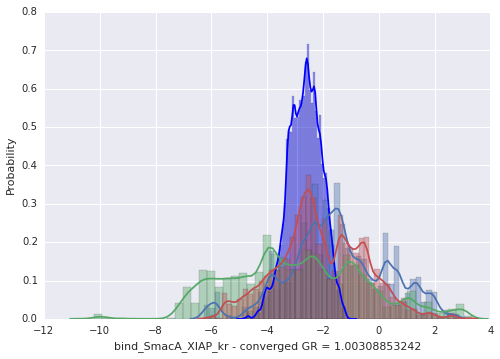

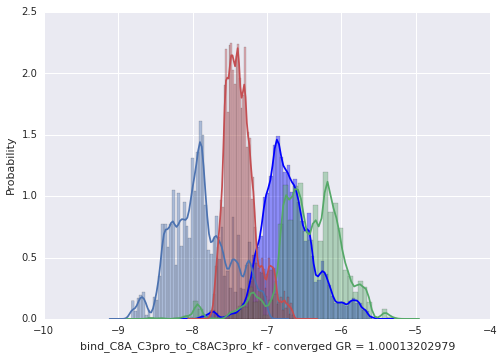

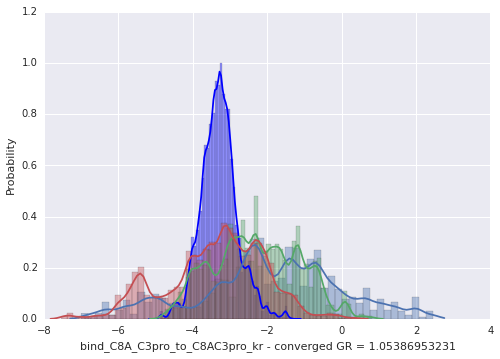

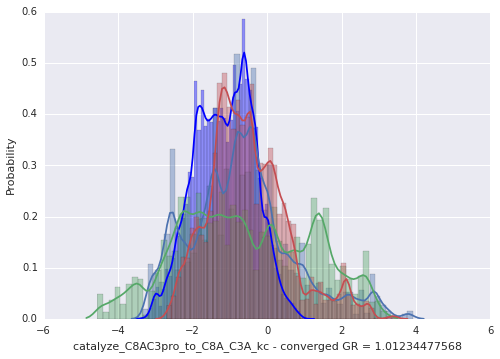

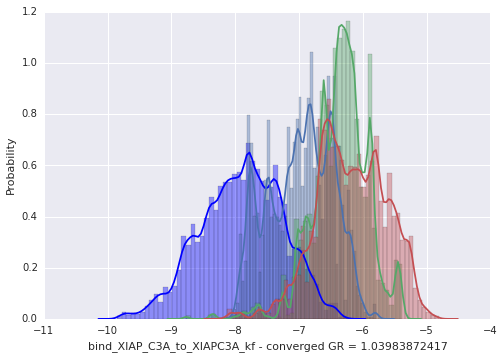

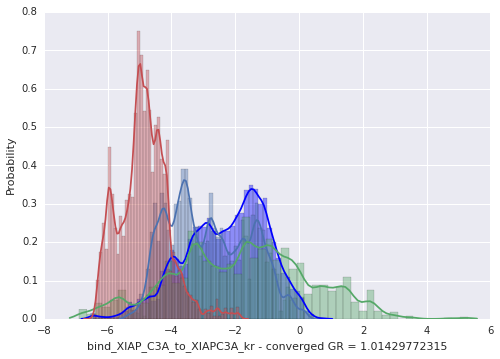

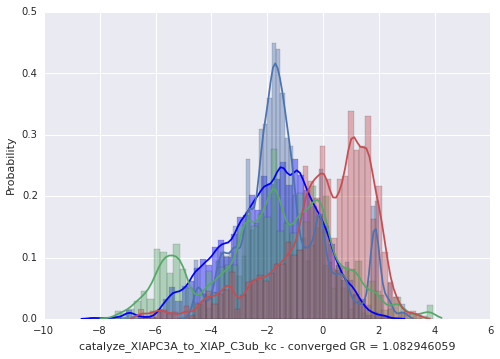

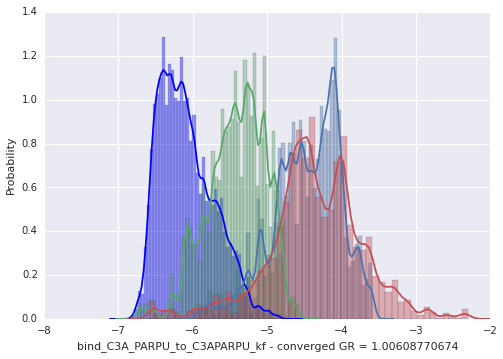

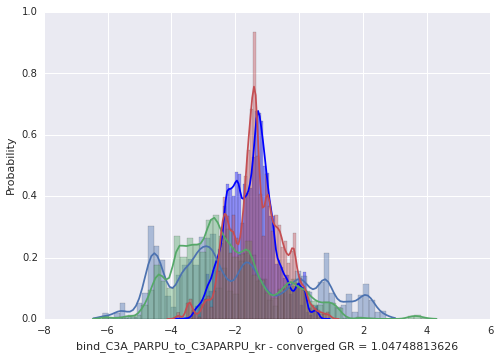

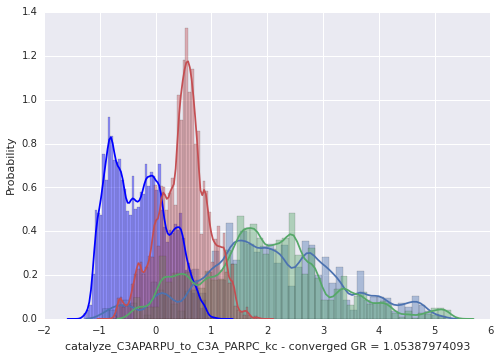

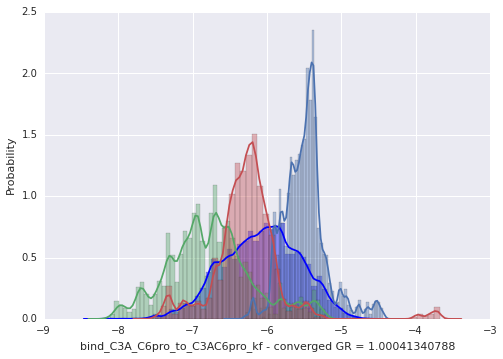

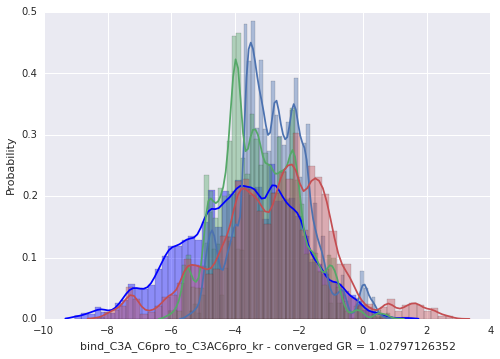

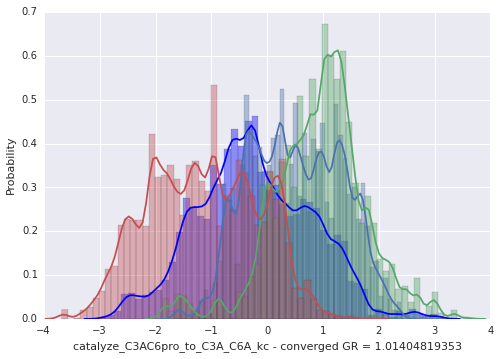

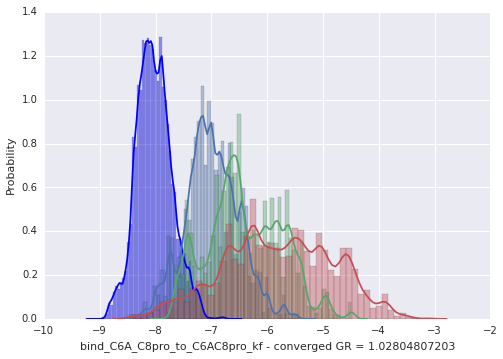

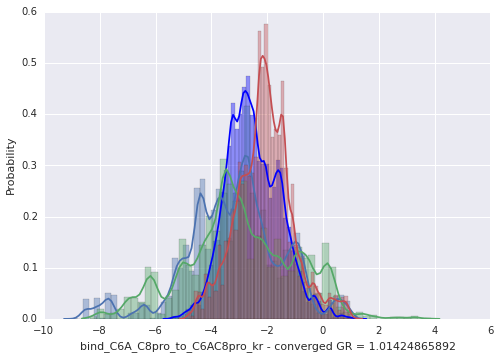

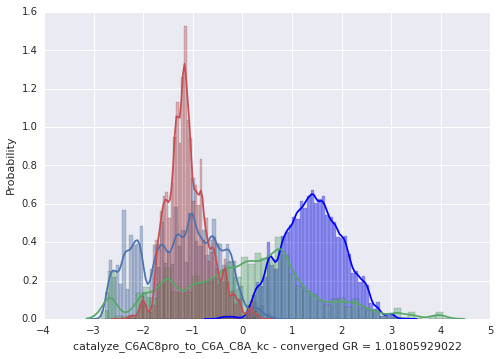

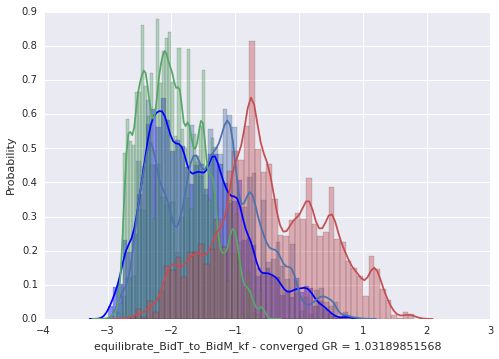

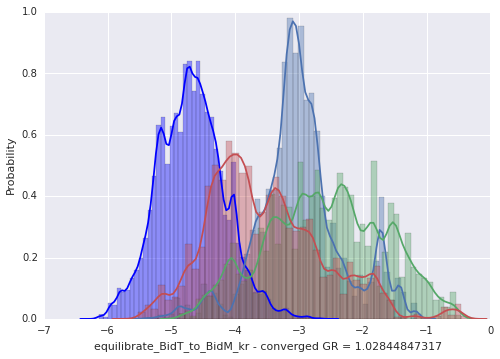

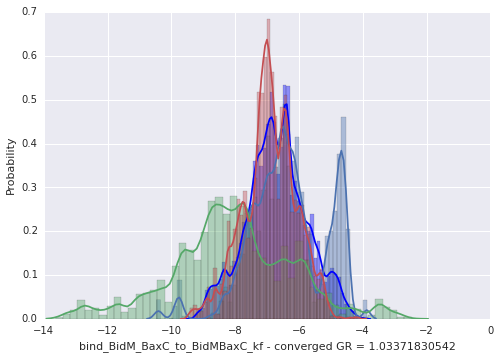

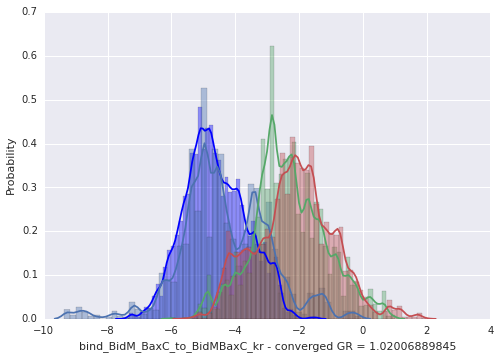

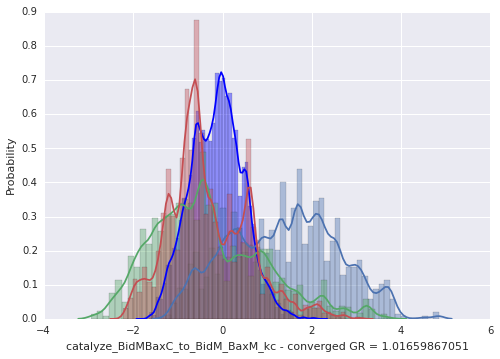

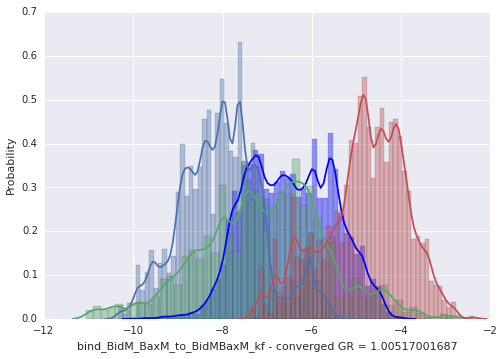

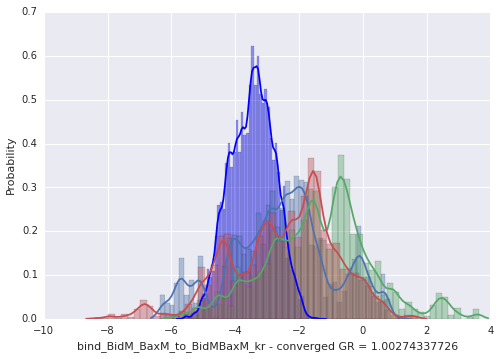

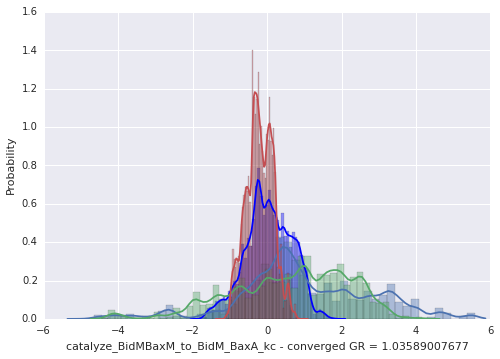

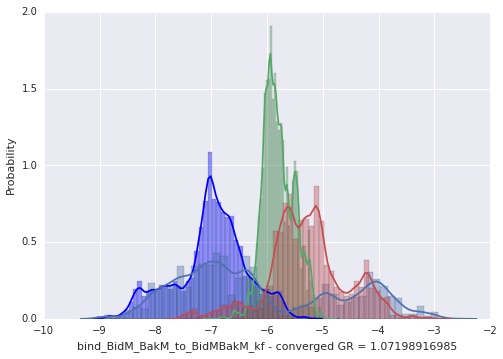

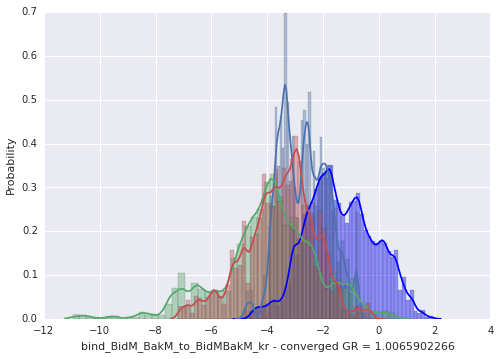

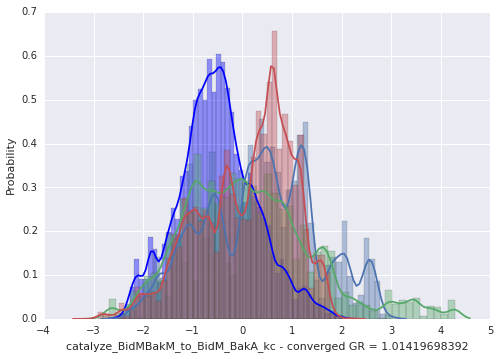

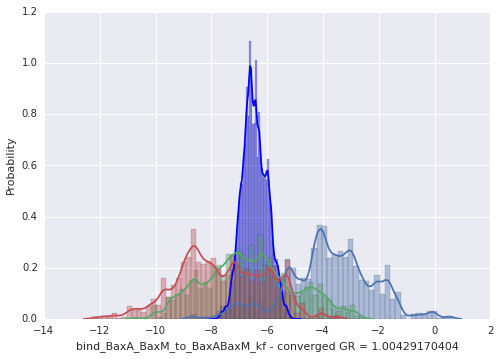

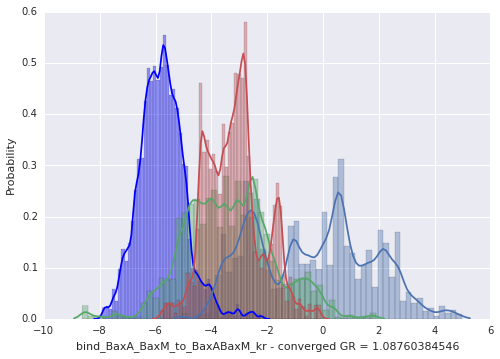

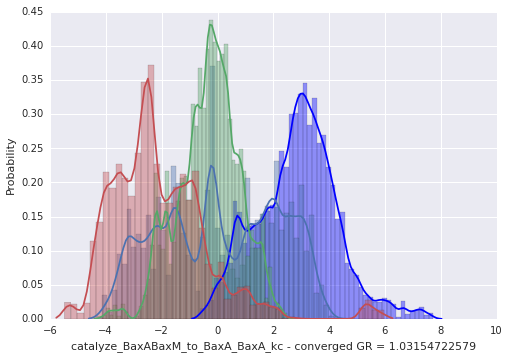

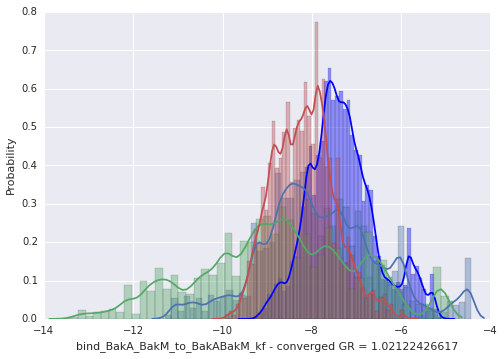

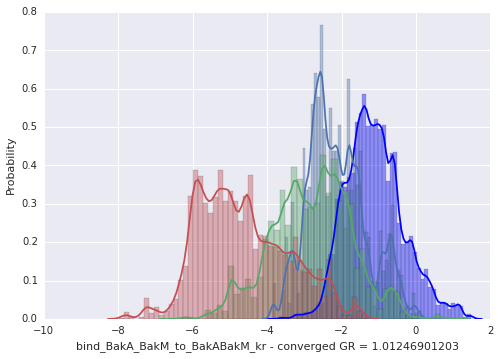

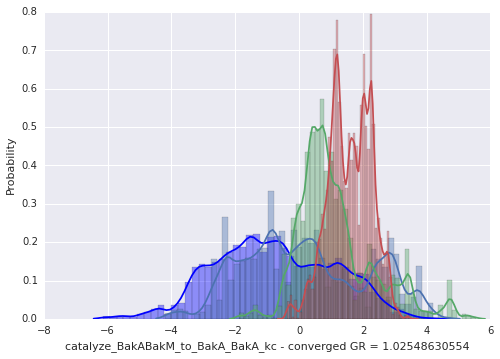

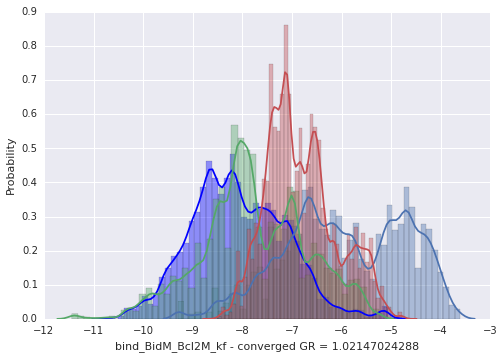

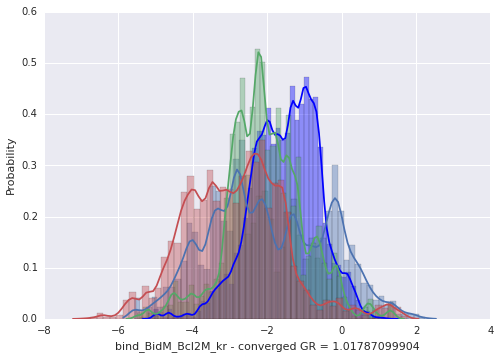

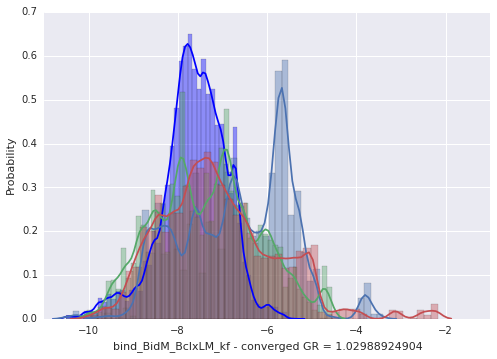

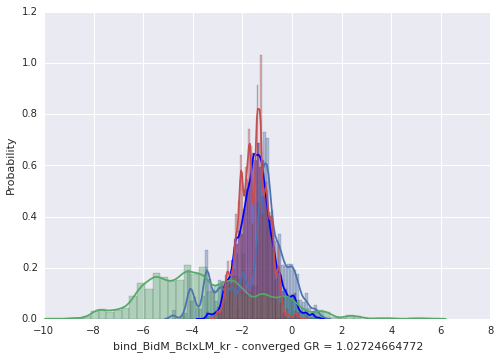

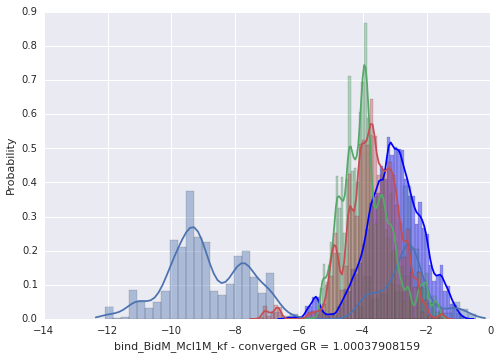

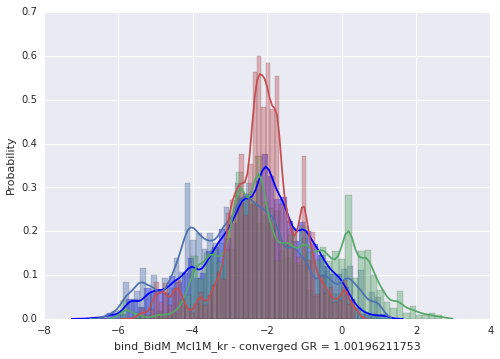

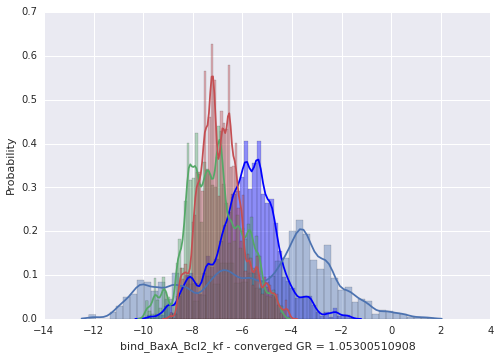

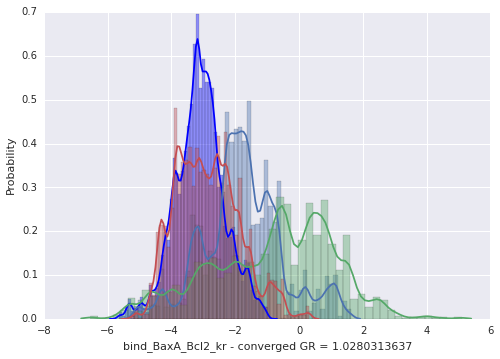

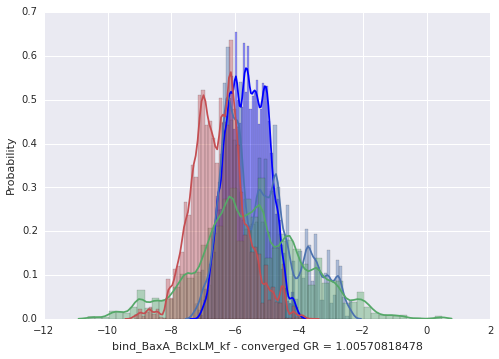

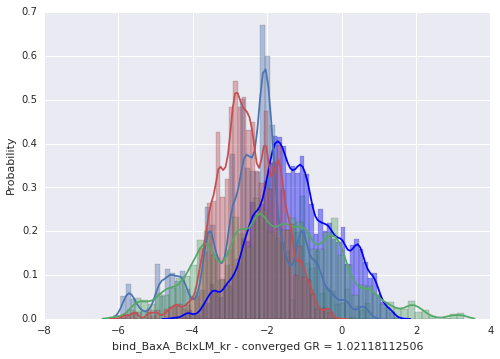

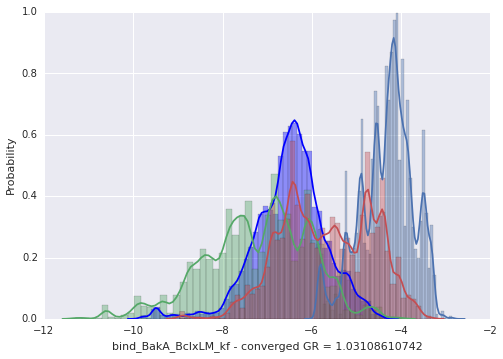

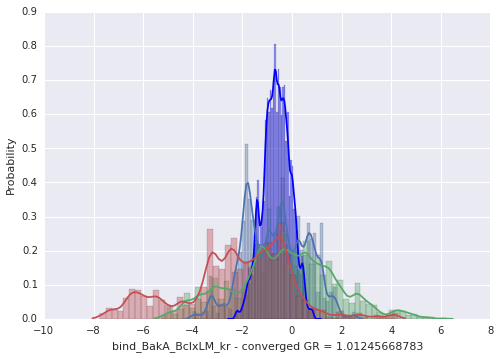

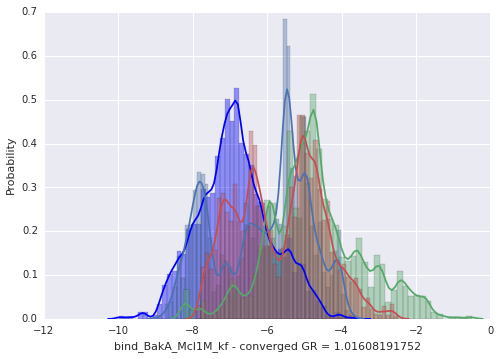

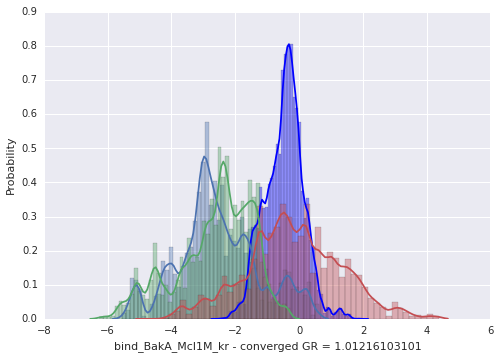

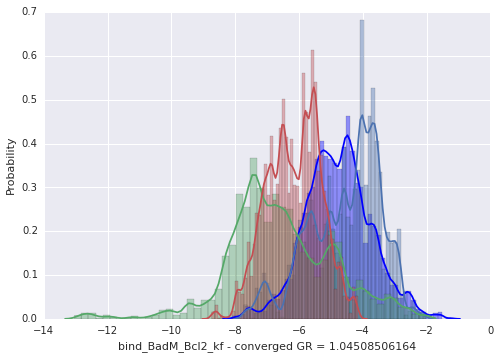

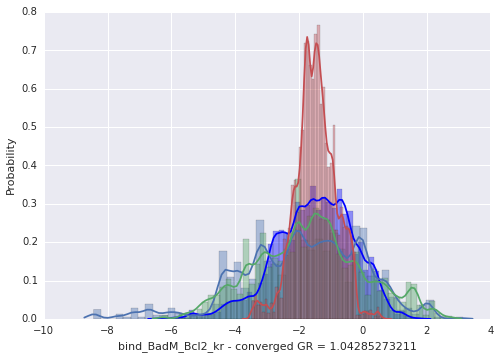

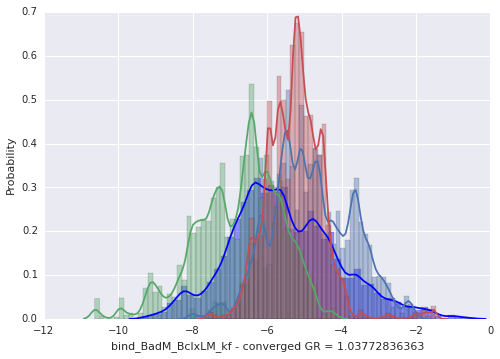

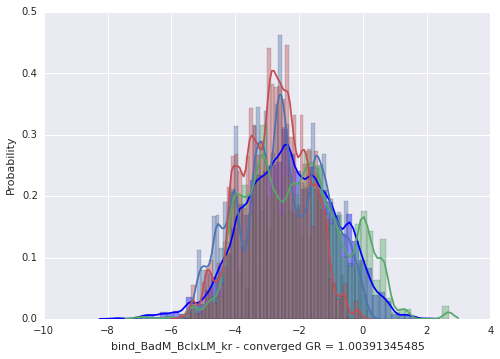

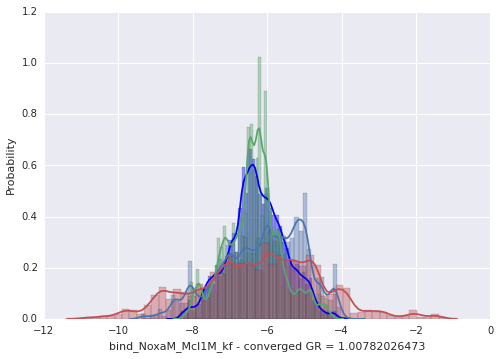

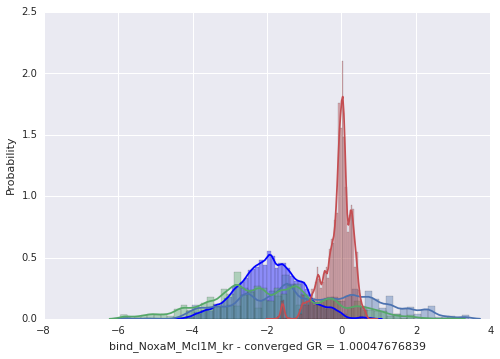

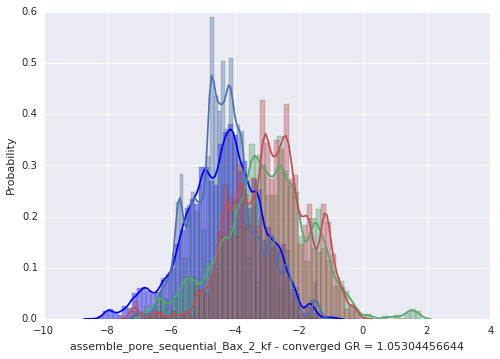

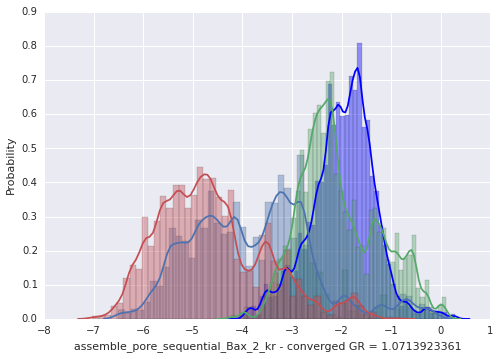

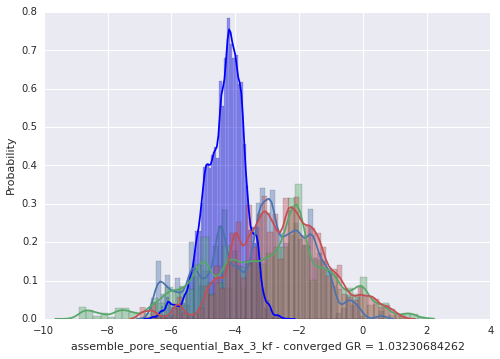

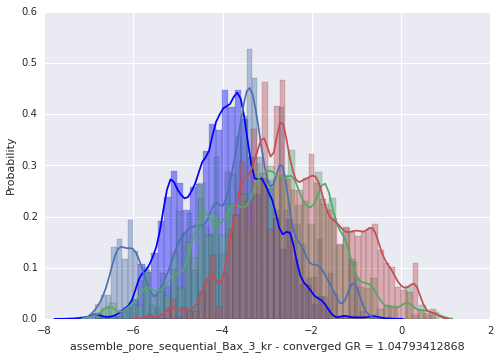

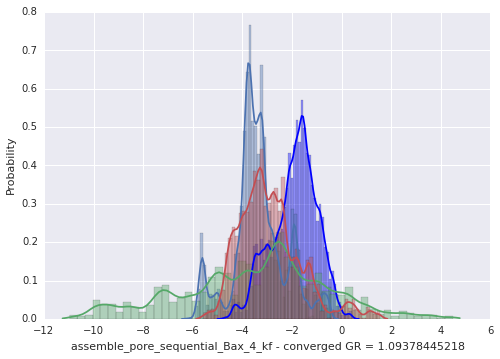

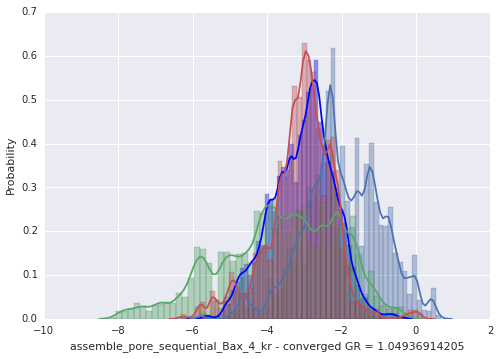

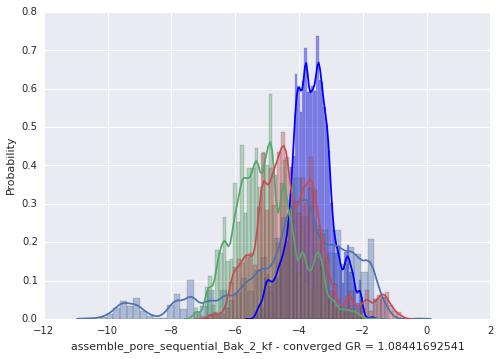

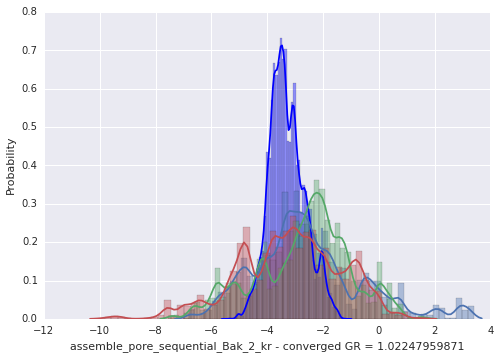

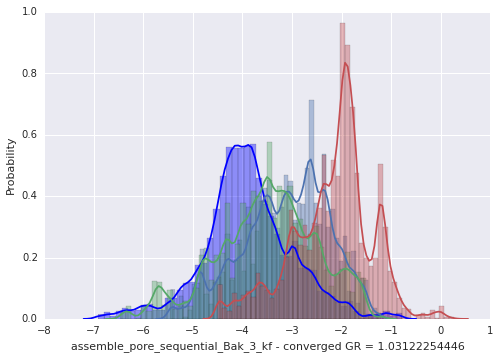

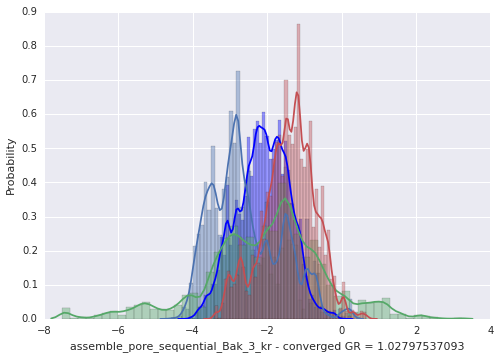

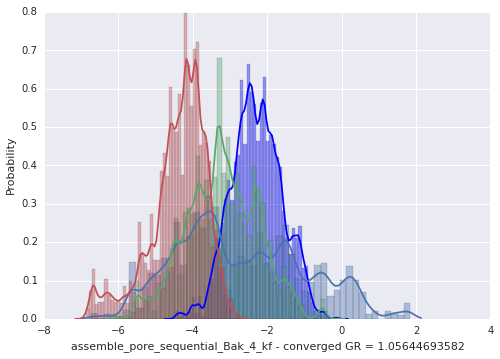

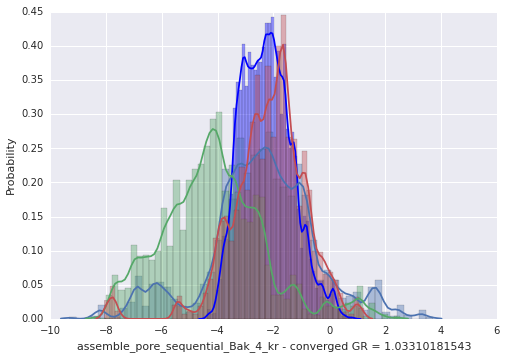

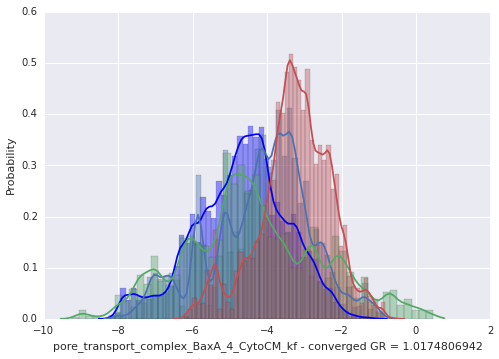

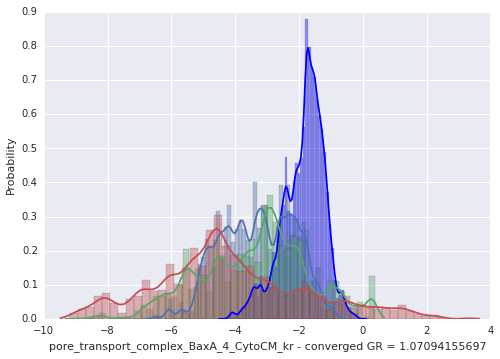

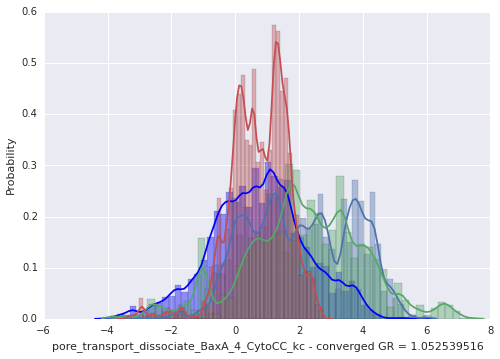

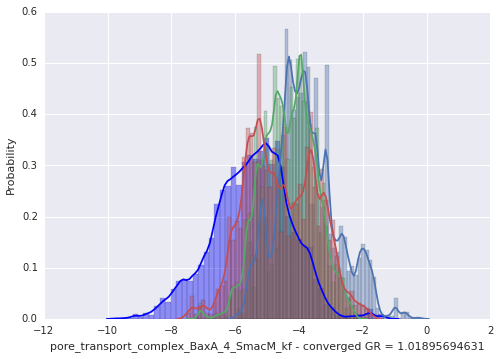

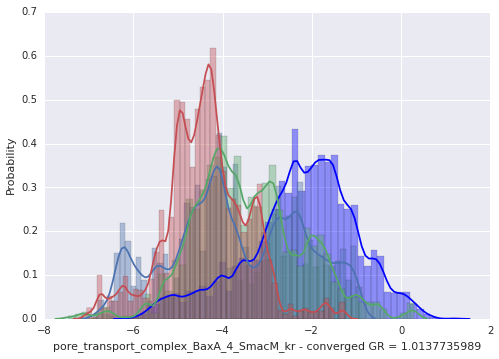

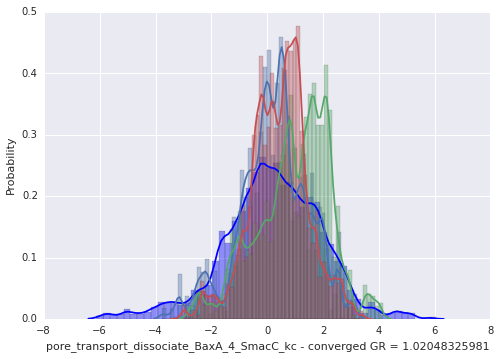

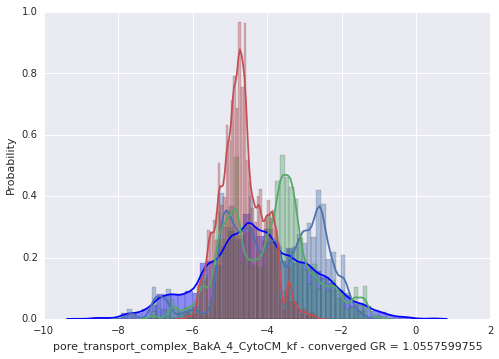

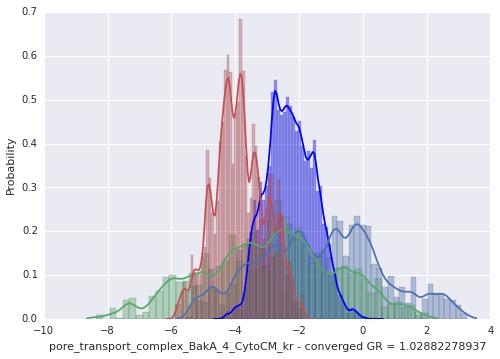

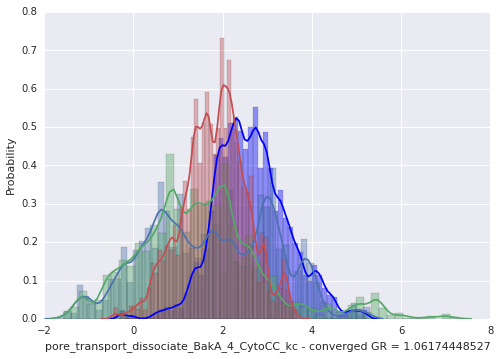

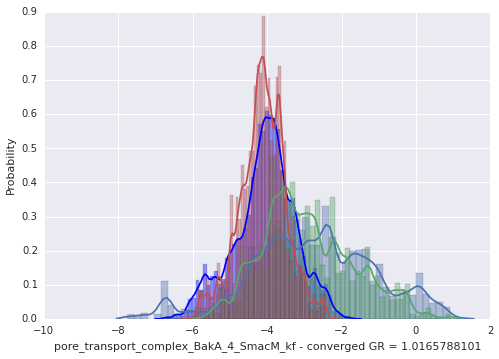

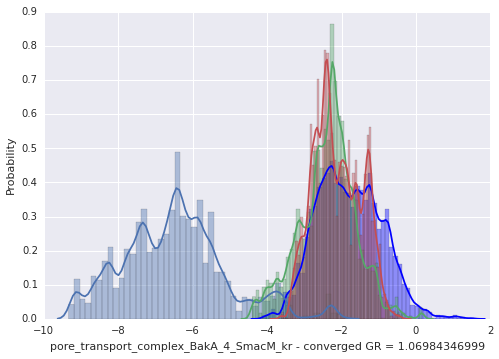

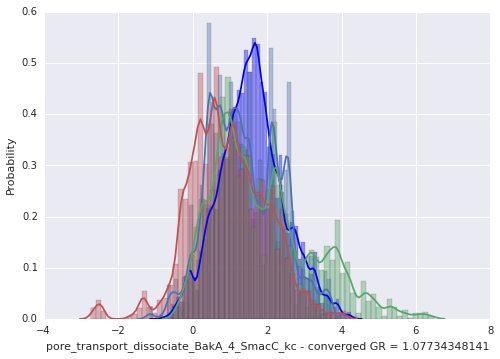

In [ ]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    sns.plotting_context('notebook')
    ax = sns.distplot(trace_arr_a[:,dim], hist=True, color='b')
    sns.distplot(trace_arr_b[:,dim], hist=True)
    sns.distplot(trace_arr_c[:,dim], hist=True)
    sns.distplot(trace_arr_d[:,dim], hist=True)
    if gelman_rubin_dicts['a'][param_name] < 1.2:
        sns.axlabel(param_name+' - converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')
    else:
        sns.axlabel(param_name+' - not converged GR = '+str(gelman_rubin_dicts['a'][param_name]), 'Probability')

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)


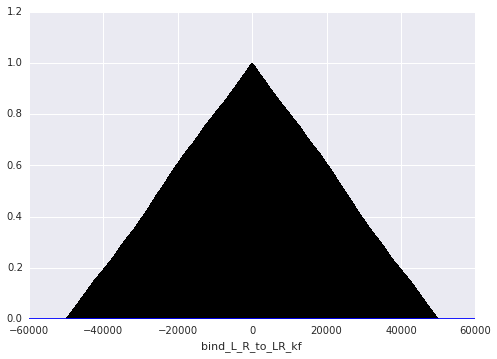

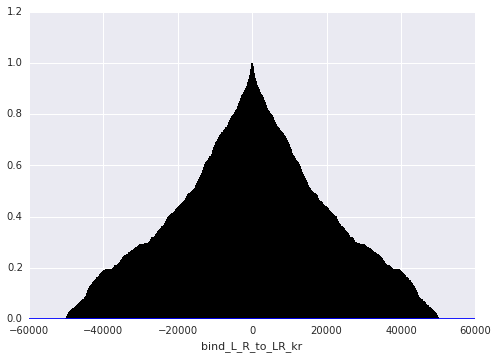

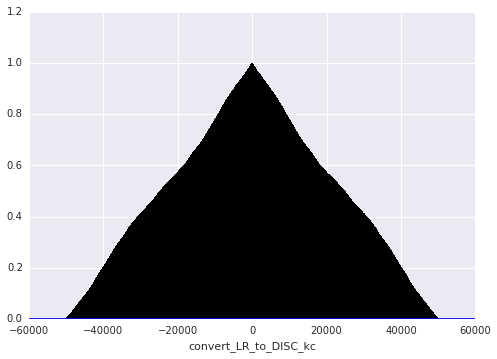

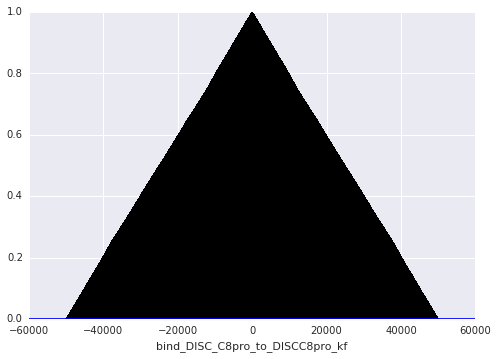

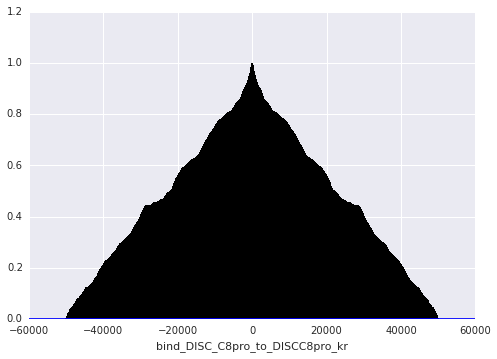

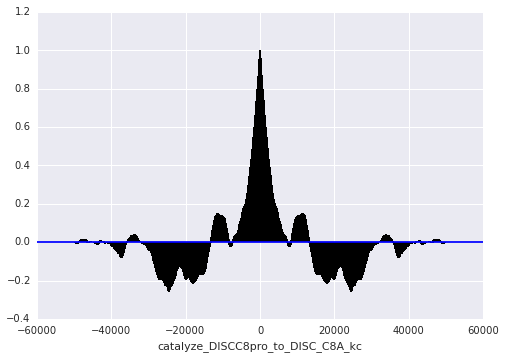

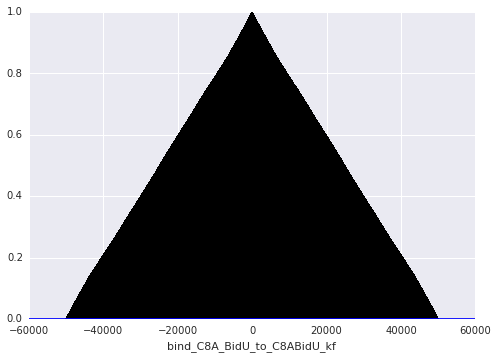

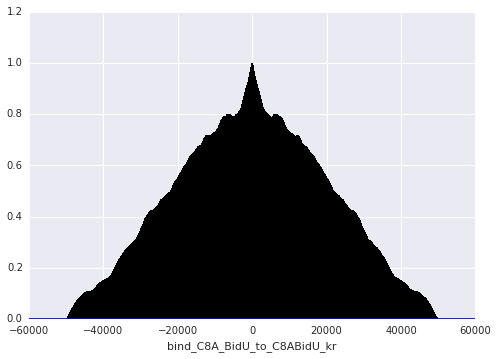

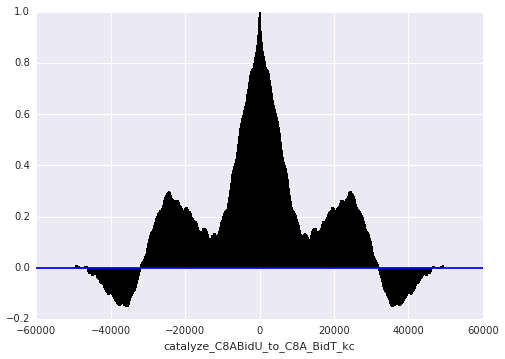

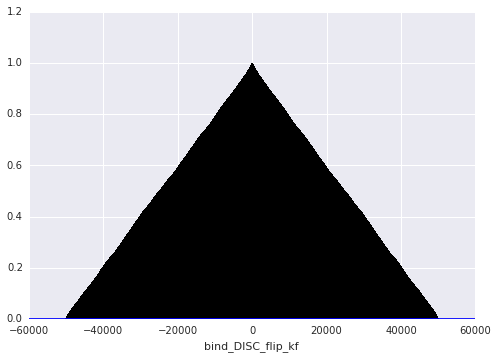

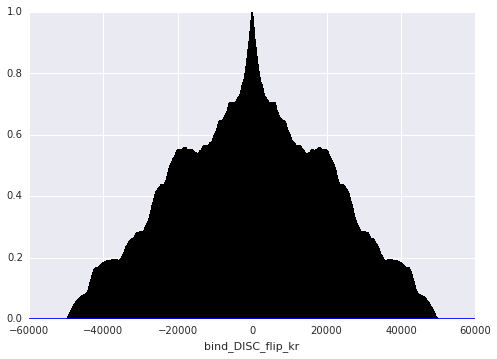

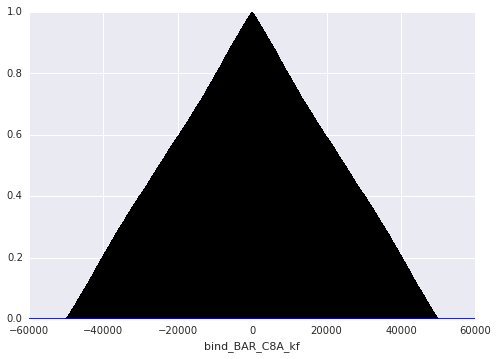

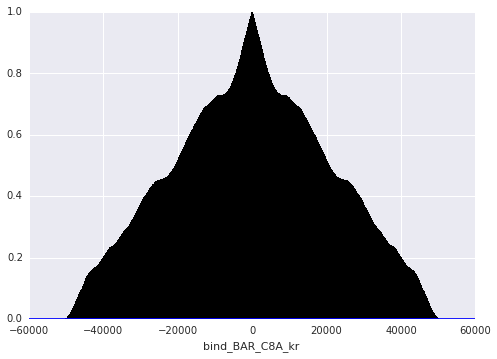

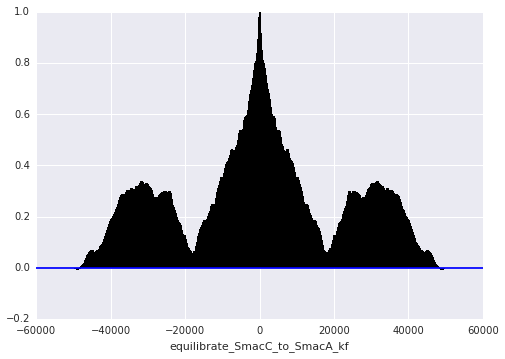

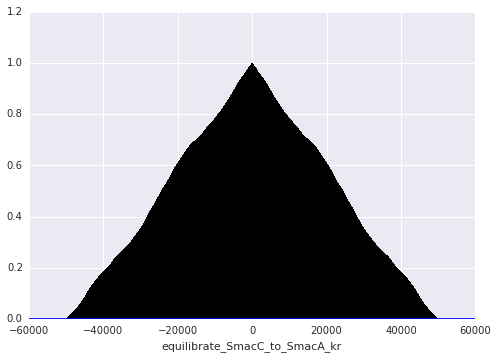

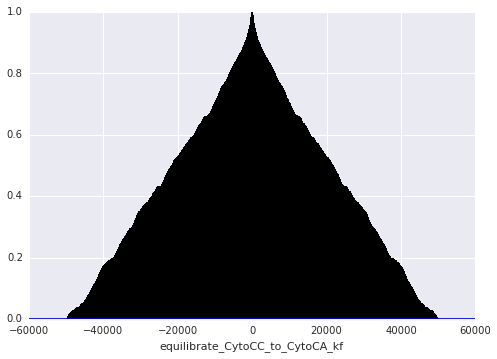

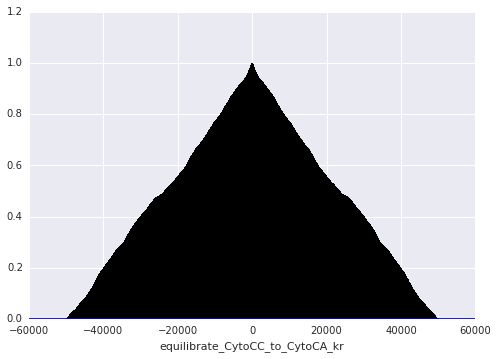

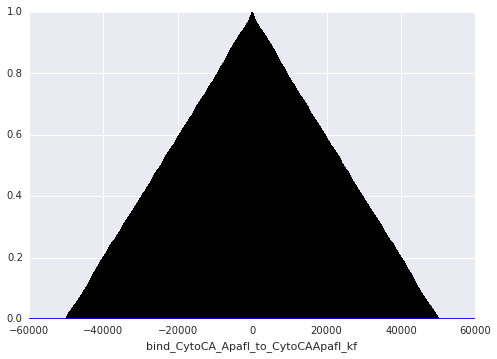

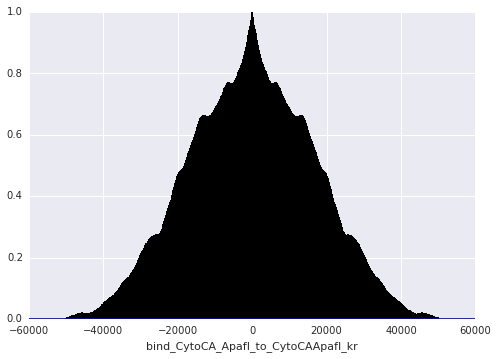

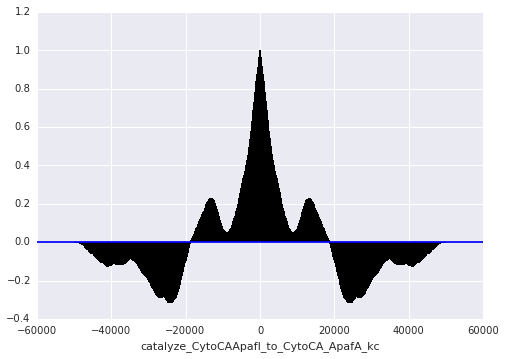

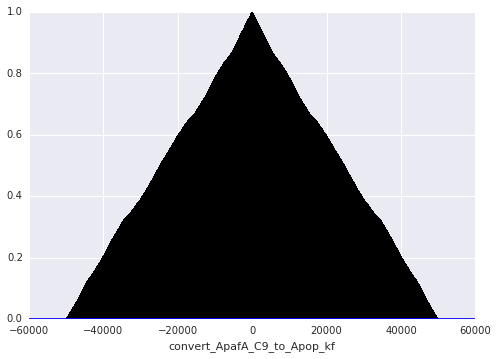

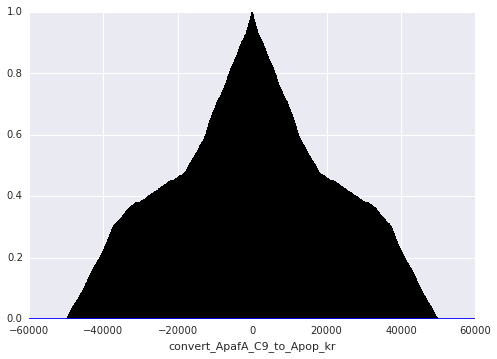

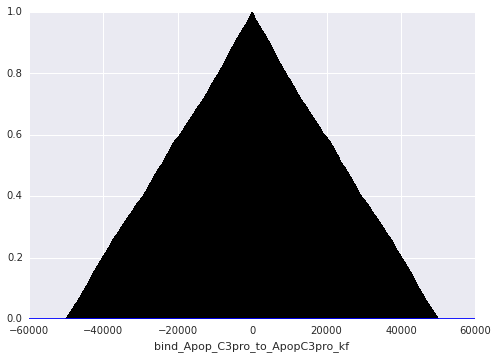

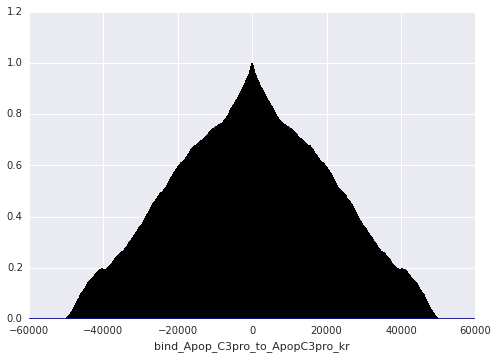

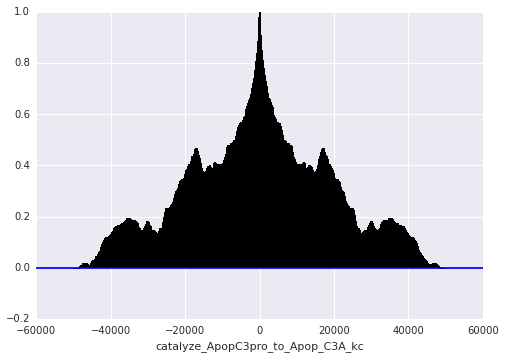

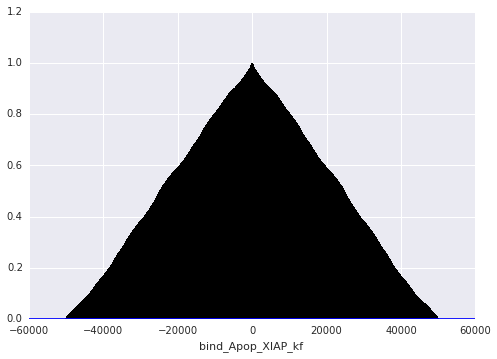

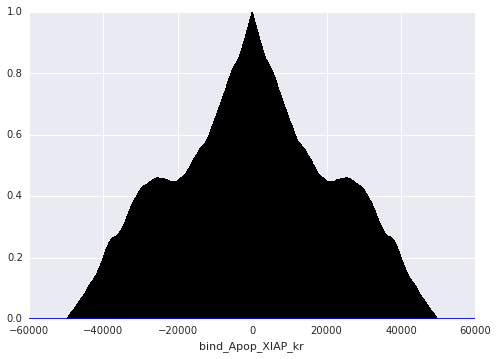

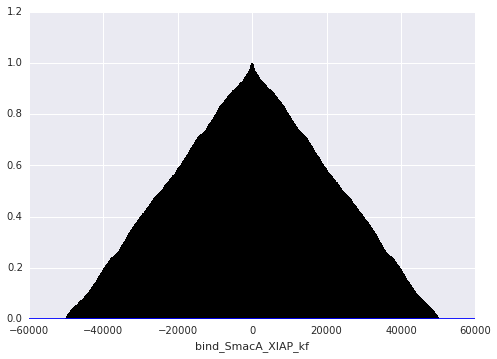

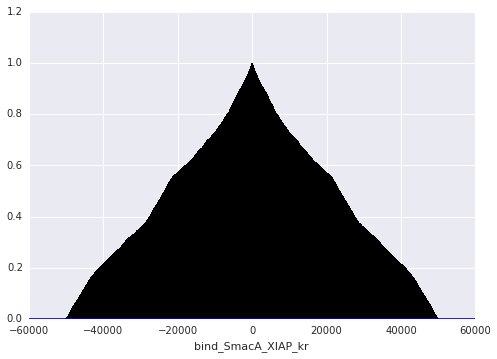

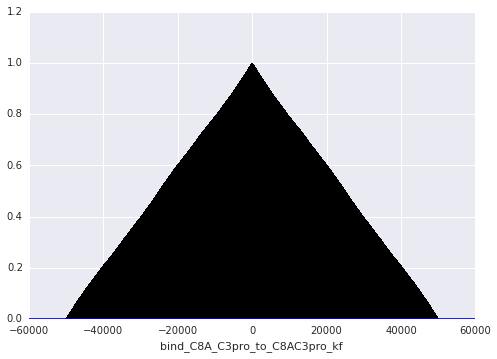

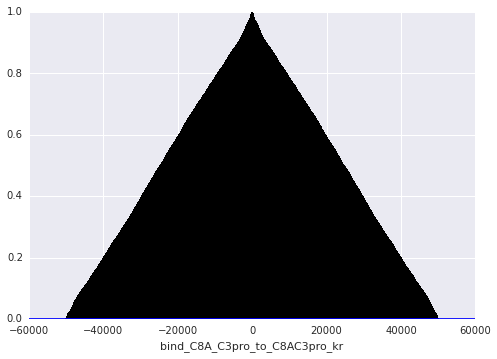

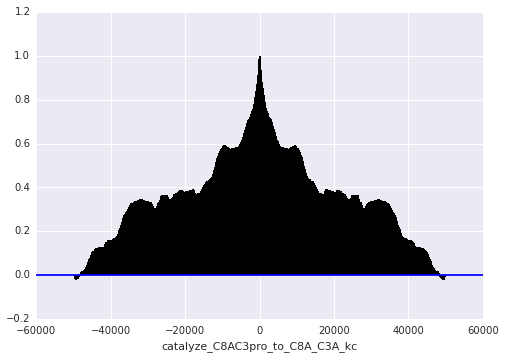

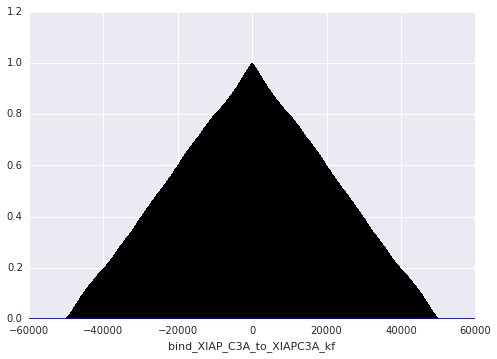

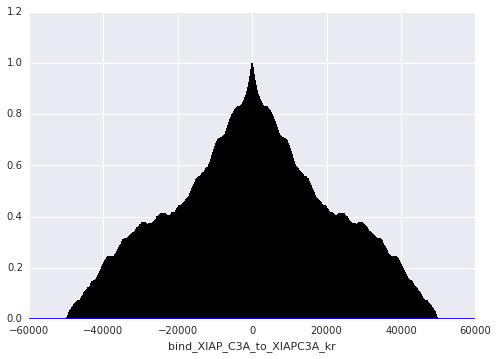

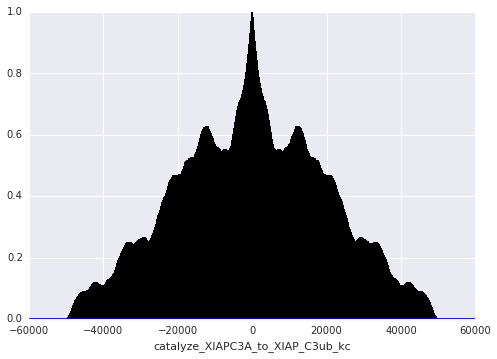

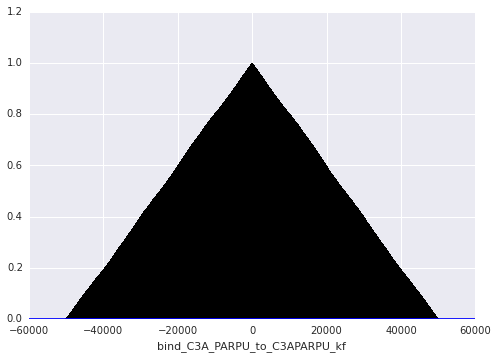

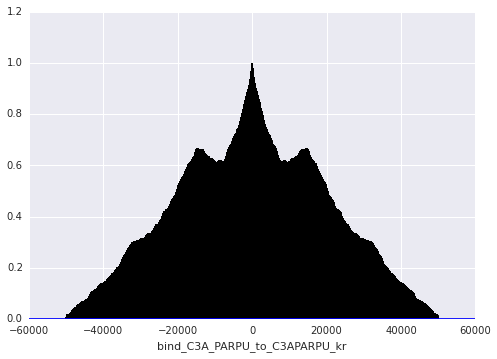

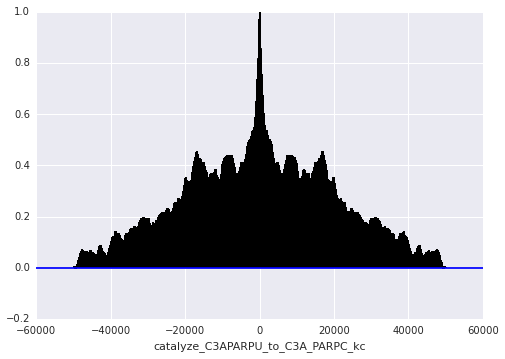

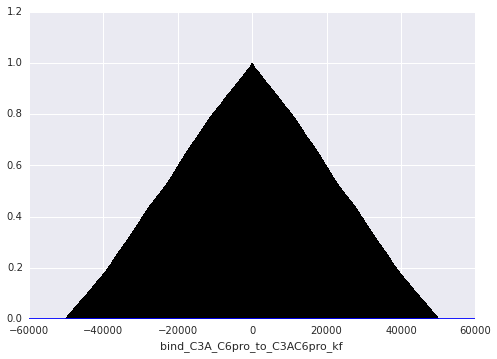

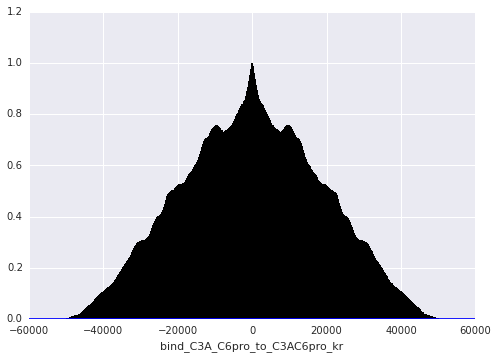

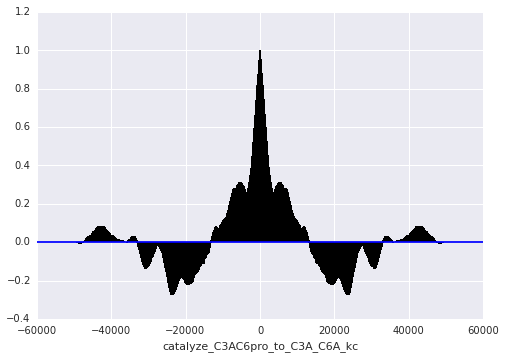

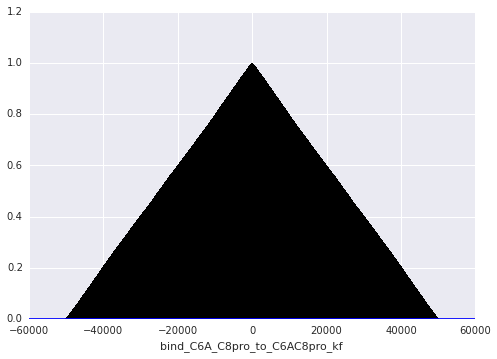

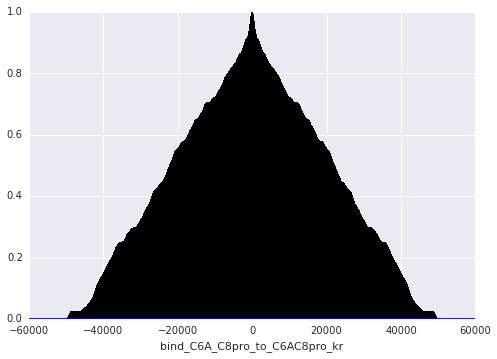

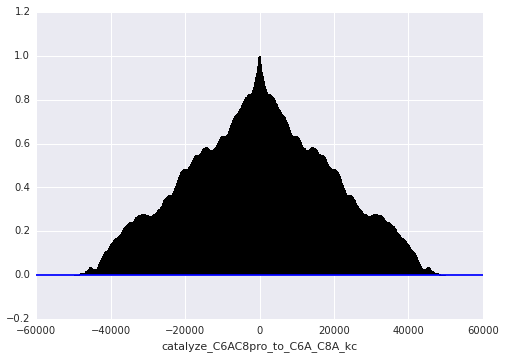

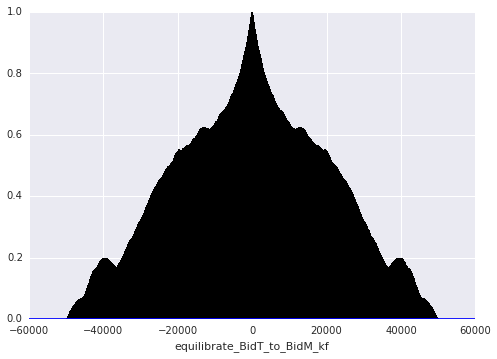

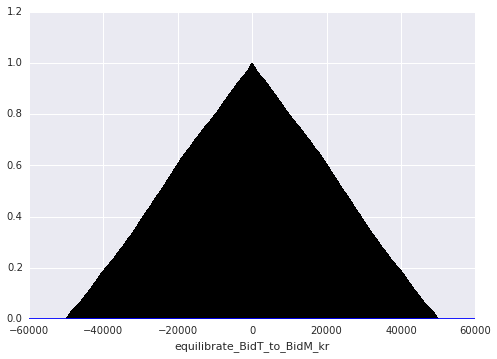

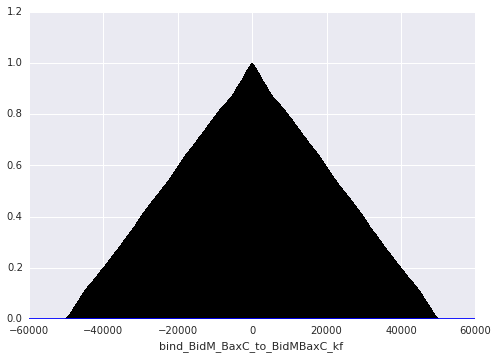

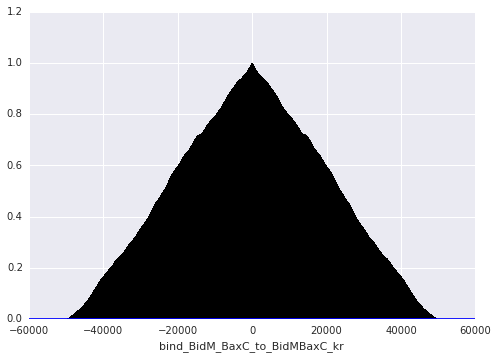

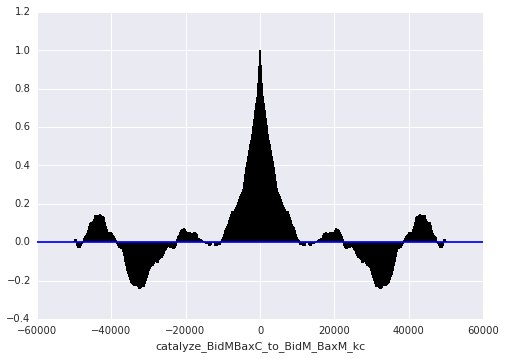

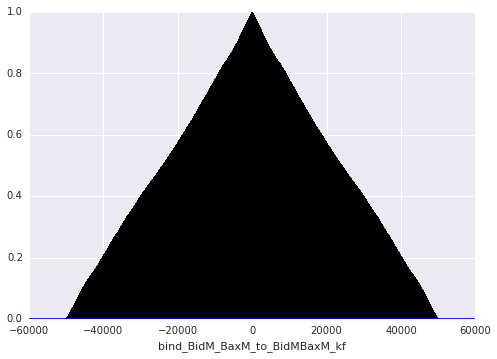

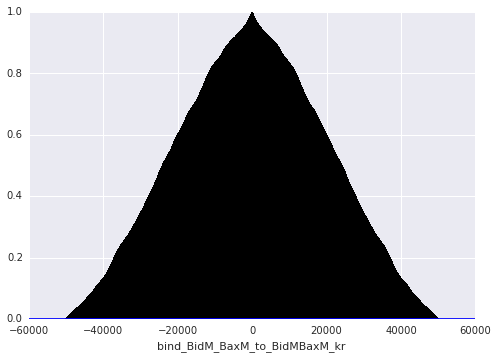

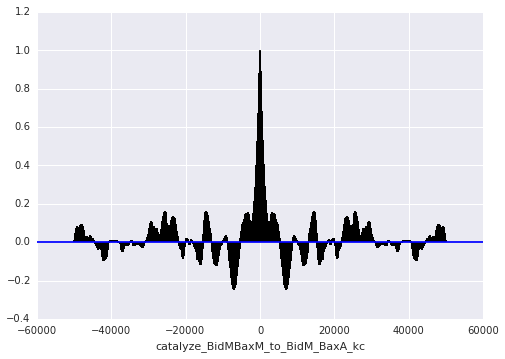

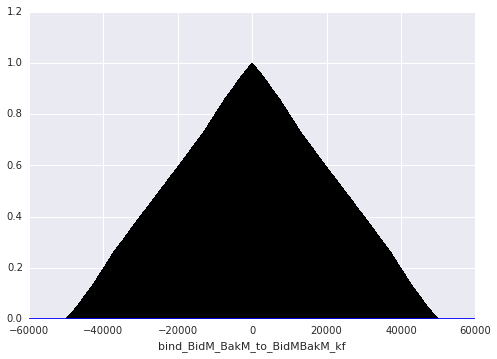

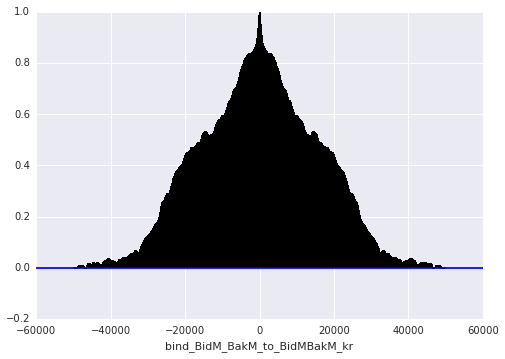

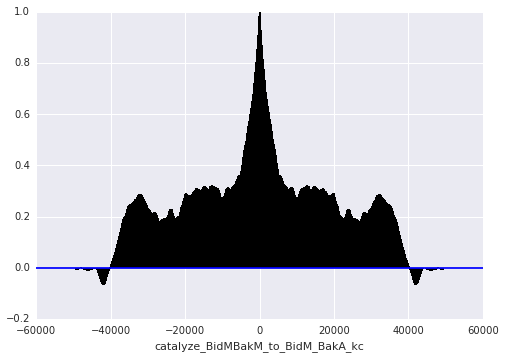

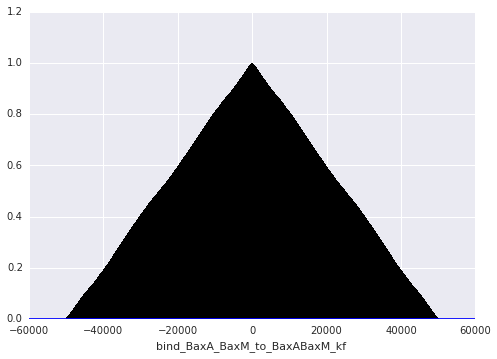

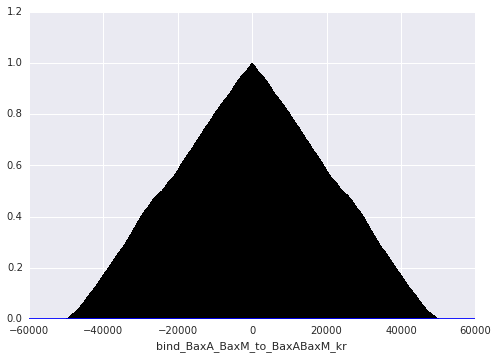

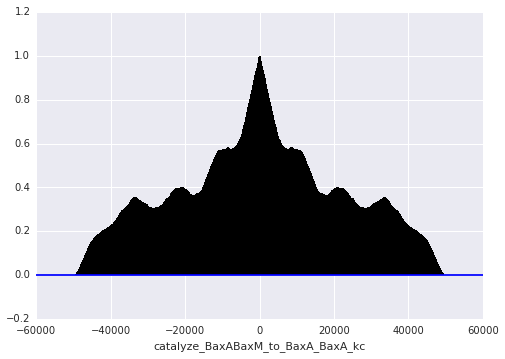

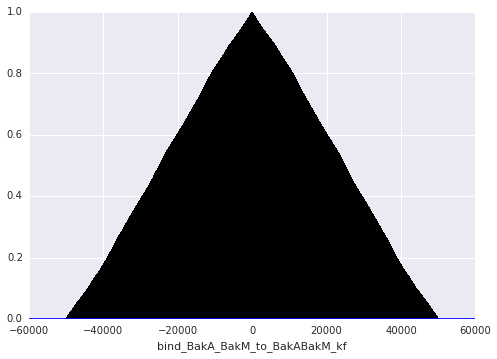

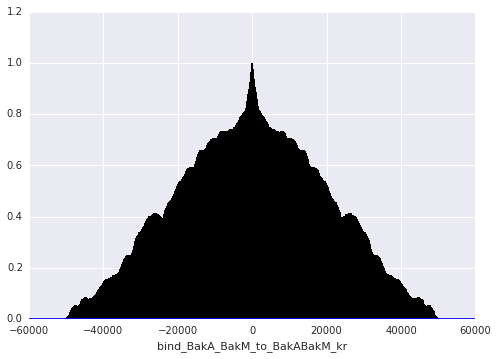

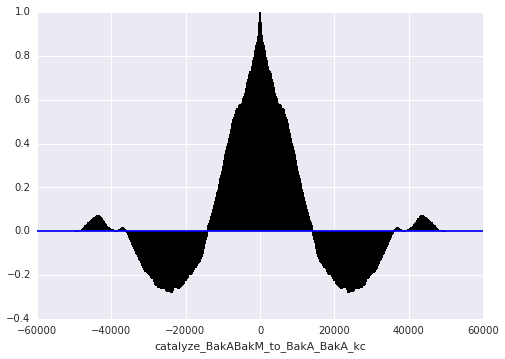

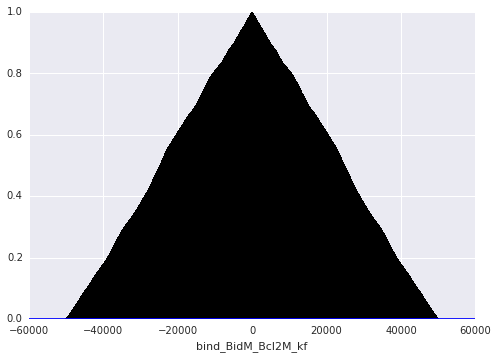

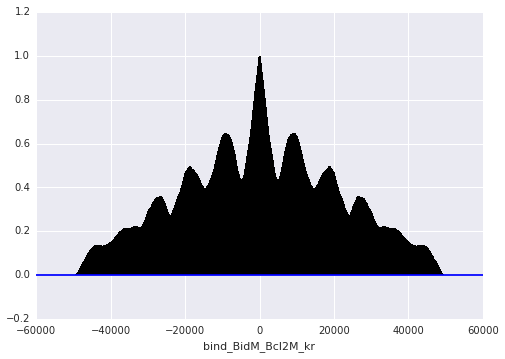

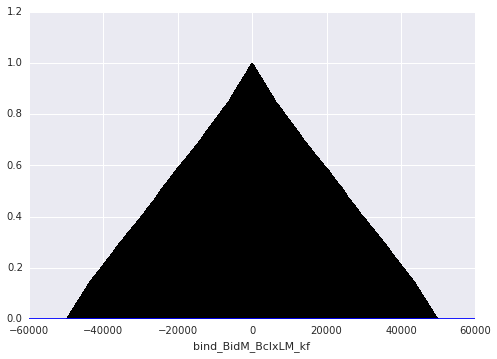

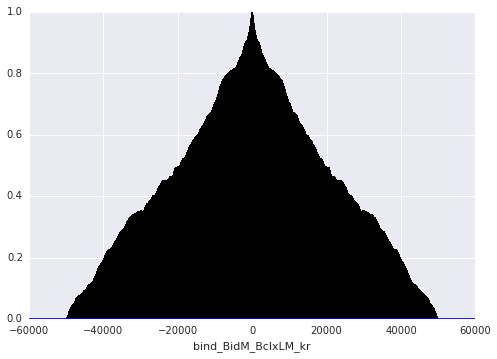

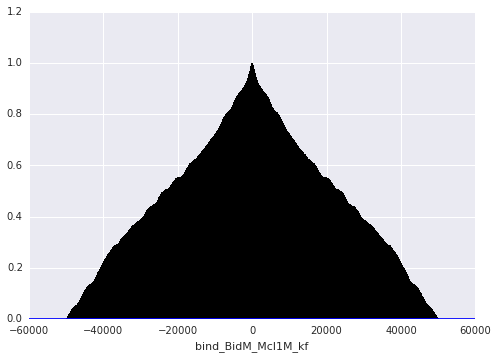

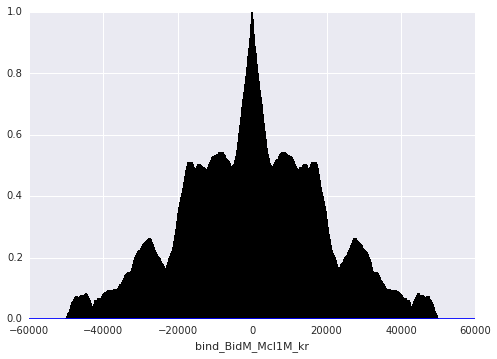

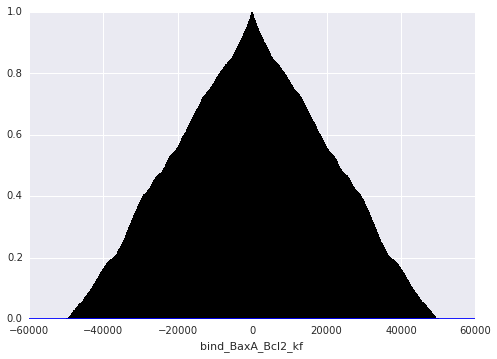

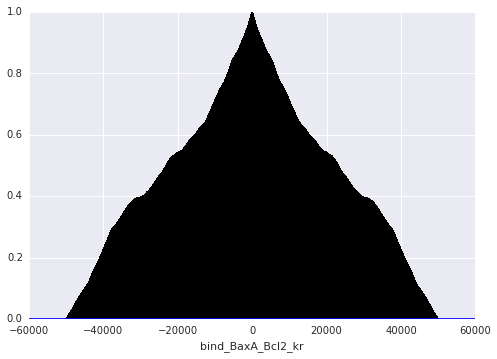

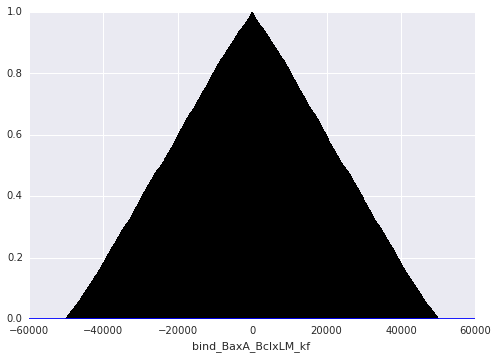

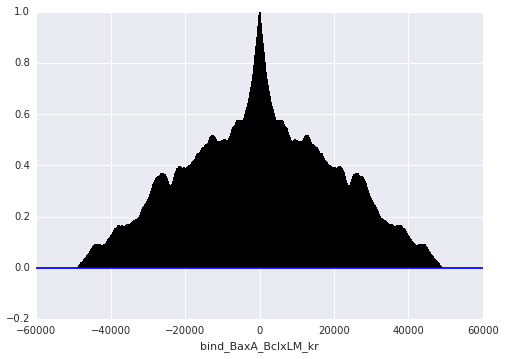

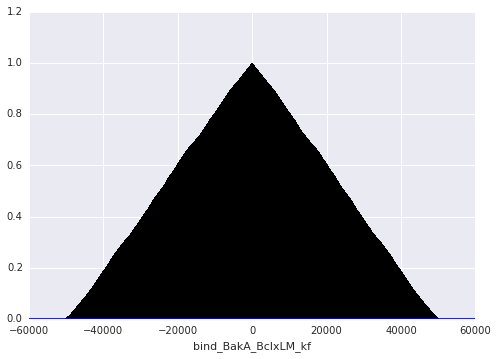

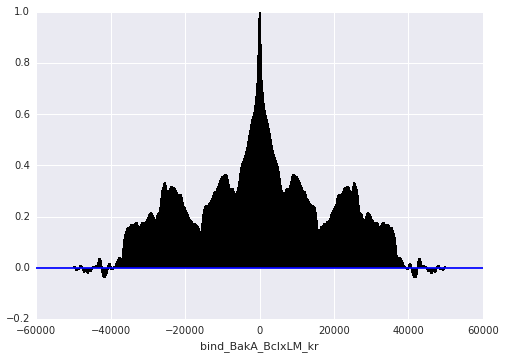

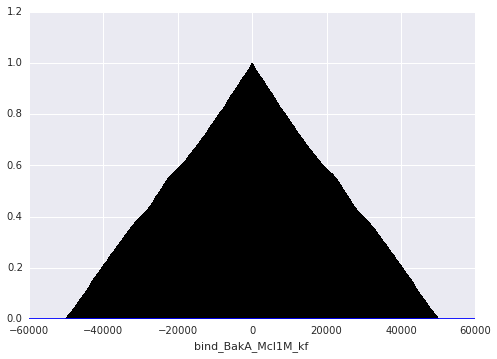

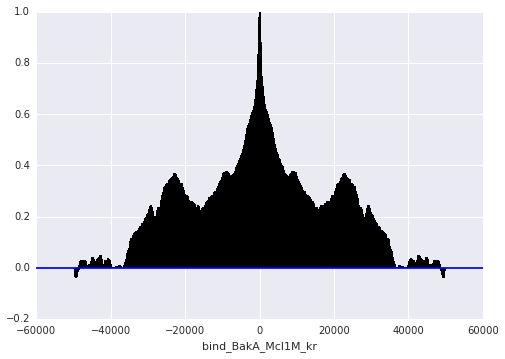

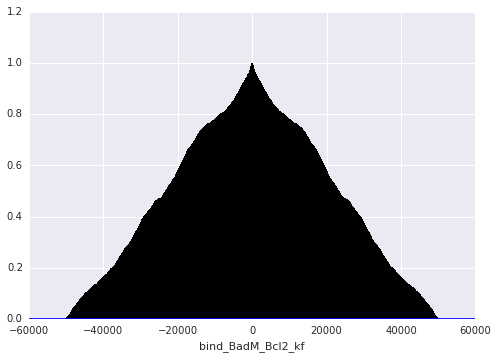

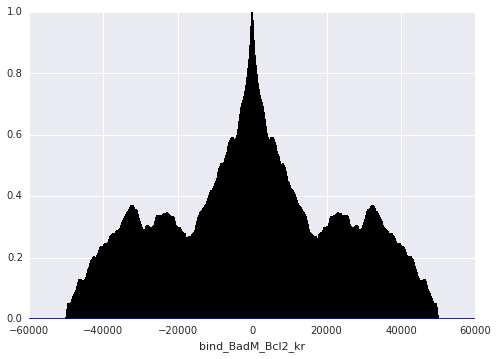

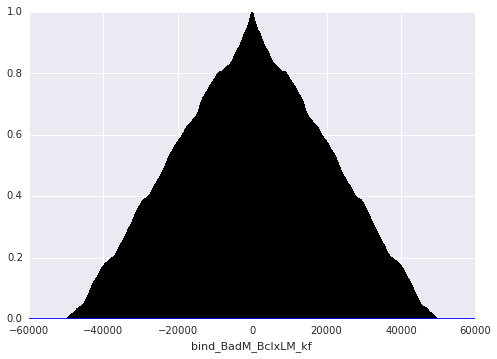

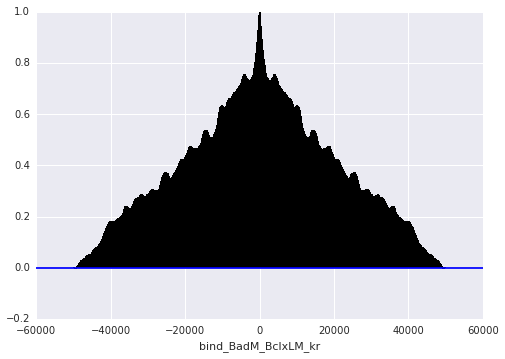

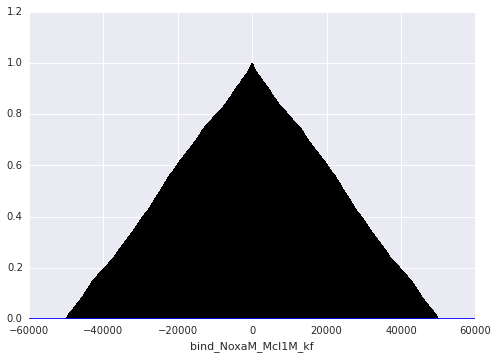

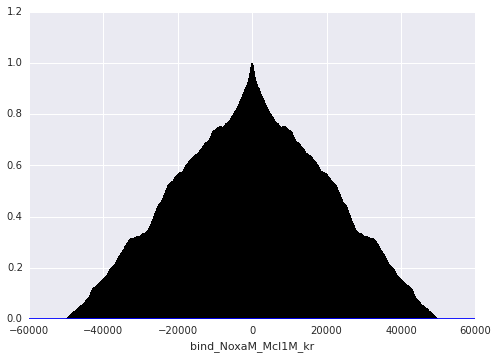

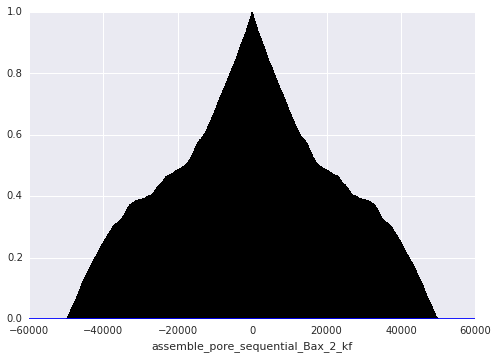

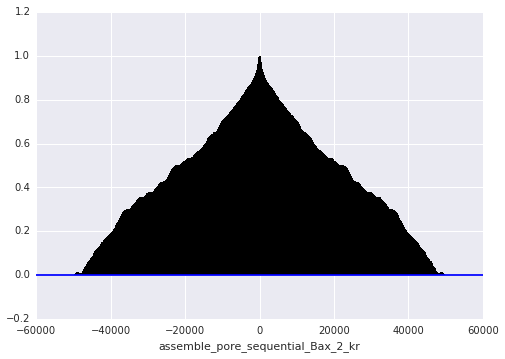

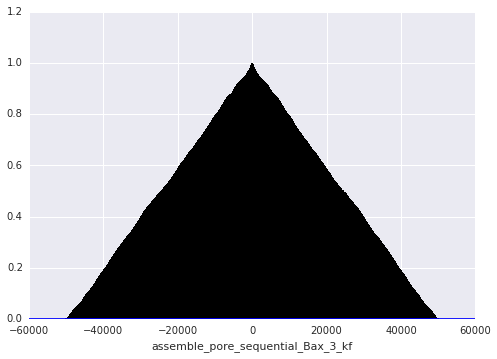

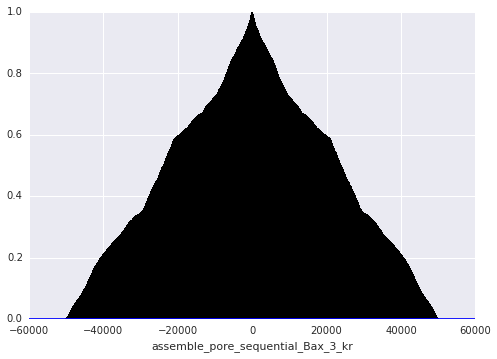

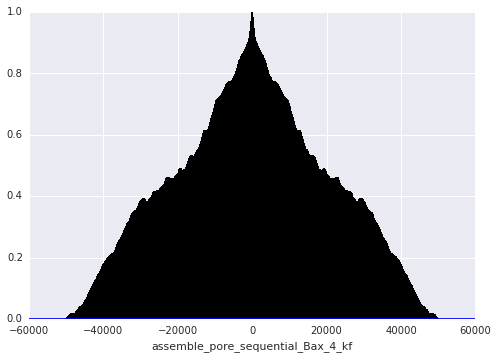

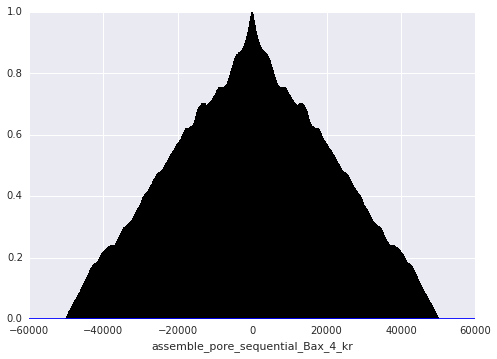

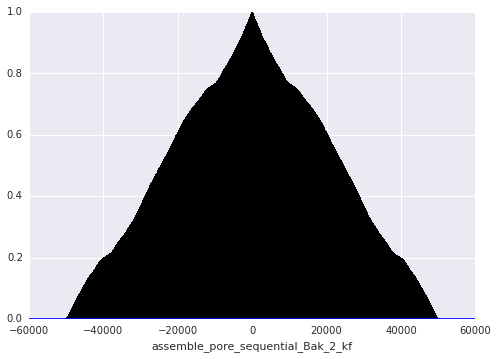

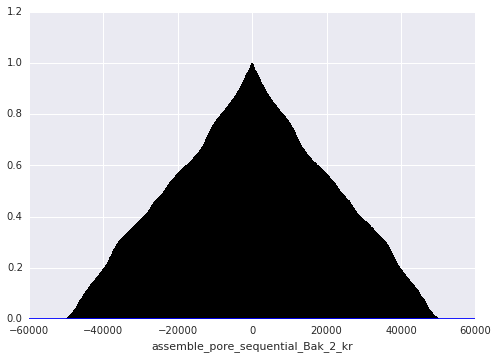

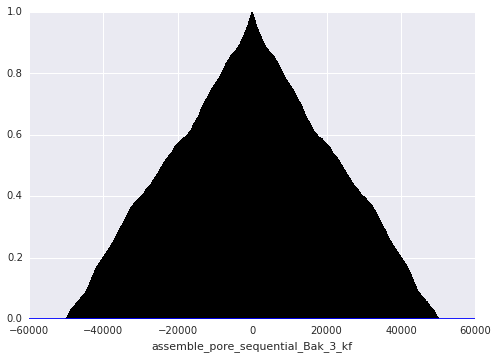

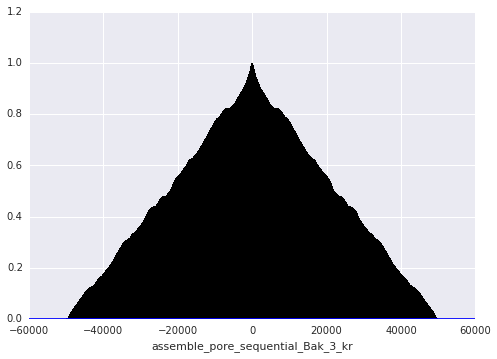

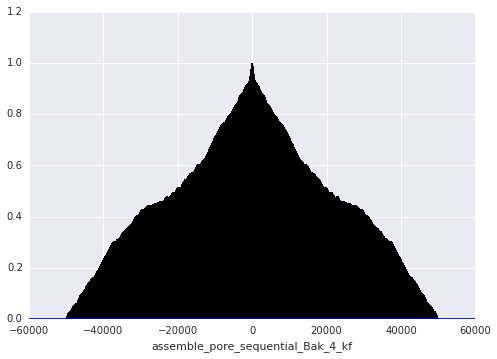

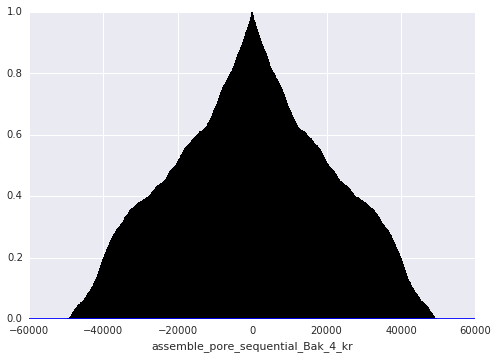

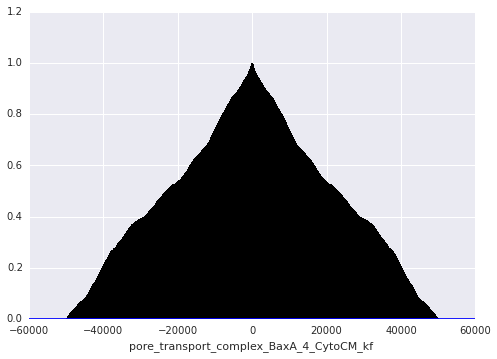

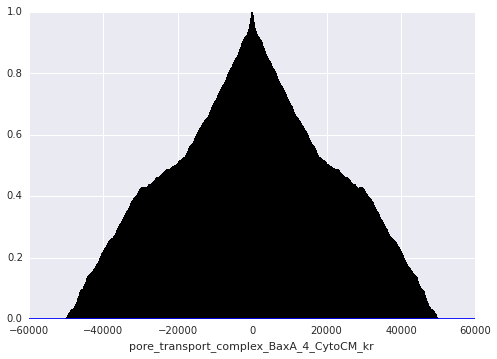

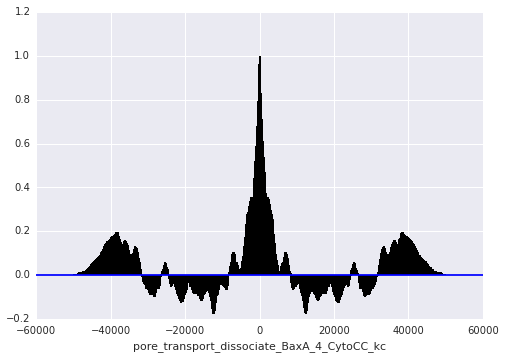

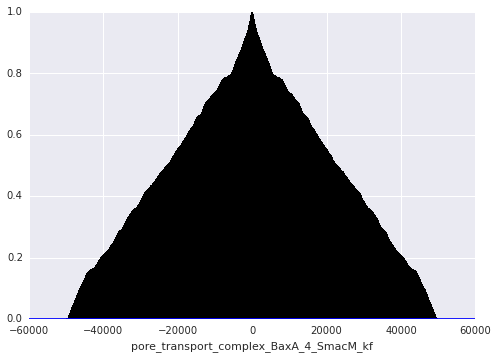

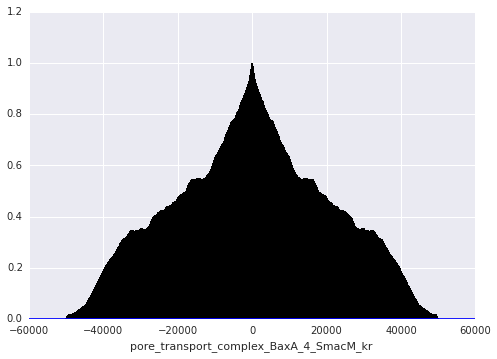

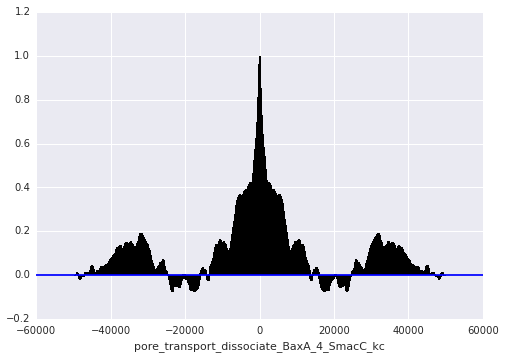

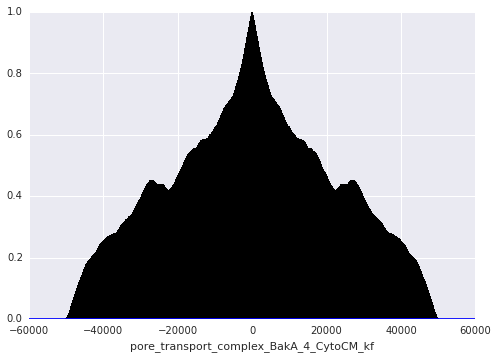

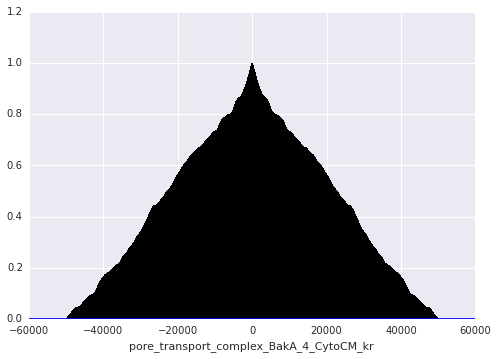

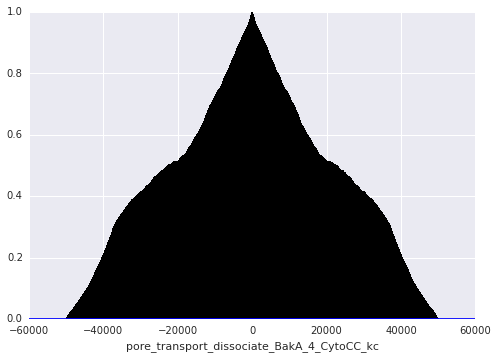

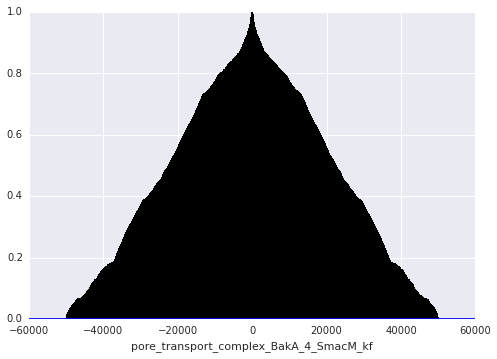

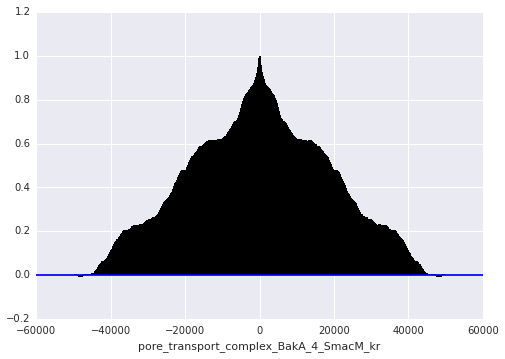

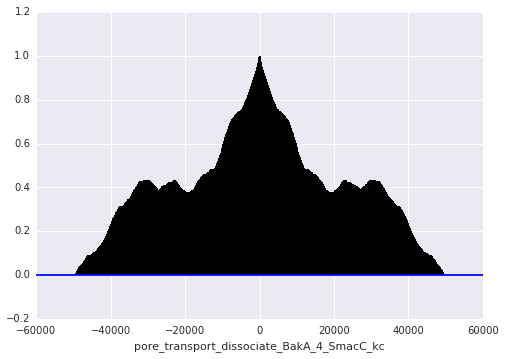

In [14]:
for dim, param_name in enumerate([param.name for param in model.parameters_rules()]):
    fig = plt.figure()
    plt.acorr(traces['a'][0][:,dim], maxlags=None)
    plt.xlabel(str(param_name))

In [ ]:
corner(trace_arr_a[:,50:60:], labels=param_trace_dict_a['param_list'][50:60], bins=10)